# Time Travel Problem - v3

## Step1 - best stocks between 1-1-1960 and 10-11-2017

Fix path for Windows paths to universal Unix paths

In [5]:
# imports
import os
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import datetime as dt
from matplotlib import pyplot as plt
from datetime import date

In [229]:
def fix_path(my_list):
    """
    Input: list of paths or single string path with Windows format (\\ instead of /)
    Output: fixed list of paths or single string containing only /
    """

    def replace_slash(path):
        '''replcae double backslashes in Windows paths to forward ones (compatible with UNIX)'''
        new_path = path.replace('\\', '/')
        return new_path

    if isinstance(my_list, list):  # if it's a list return the fixed list of items
        my_new_list = []
        for item in my_list:
            fixed_item = replace_slash(item)
            my_new_list.append(fixed_item)

        return my_new_list

    elif isinstance(my_list, str):  # if it's a string just return the fixed one
        return replace_slash(my_list)

def is_empty_file(fpath):  
    """
    Input: filepath
    Output: True if file in filepath empty, else False
    """
    return os.stat(fpath).st_size == 0

    
def create_df_with_eval_metrics(files_subpath):
    """
    Input: path to folder with the stocks
    Output: df with evaluation metrics for each stock
    """
    
    current_working_dir = os.getcwd()
    current_working_dir = fix_path(current_working_dir)  # convert windows-styled path to unix compatible (forward slashes only)
    stocks_dir = f'{current_working_dir}{files_subpath}' #select the path to save generated videos

    all_stocks = glob.glob(f'{stocks_dir}/*')  # list containing the paths to all stocks' txtS files
    all_stocks = fix_path(all_stocks)

    df = pd.DataFrame(columns = ['Stock', 'Days', 'AHLPPS', 'MHLPPS', 'LLHH', 'Init Price', 'Path', 'Start Date', 'End Date']) #create an empty dataframe to save stock info

    index = 0

    for stock_path in all_stocks:
        if is_empty_file(stock_path): #if the size of the file is 0 which means empty file then skip it, do not parse it
            continue

        stock_name = stock_path.split('/')[-1].split('.')[0].upper() #extrack stock's name from path and convert to capital letters
        print(f"Reading: {stock_name}")
        df.loc[index, 'Path'] = stock_path
        df.loc[index, 'Stock'] = stock_name

        
        #operation on data regarding each stock
        stock_data = pd.read_csv(stock_path, sep=",", parse_dates=[0]) #read stcok data - column 0 (1st) parsed as Date
        min_date = stock_data['Date'].min()
        max_date = stock_data['Date'].max()
        #days = (max_date - min_date).days #number of days for which stock data is provided
        days = len(stock_data['Date'])
        df.loc[index, 'Days'] = days #a metric regarding how long (time) a stock is traded

        highest_high = stock_data['High'].max()
        lowest_low = stock_data['Low'].min()
        df.loc[index, 'LLHH'] = highest_high - lowest_low

        ahlpps = (stock_data['High'] - stock_data['Low']).mean() #average high-low profit per stock
        df.loc[index, 'AHLPPS'] = ahlpps

        #avg_volume = stock_data['Volume'].mean()
        #mhlpps = round(ahlpps * avg_volume) #max (in terms of volume) high-low profit
        mhlpps = ((stock_data['High'] - stock_data['Low']) * stock_data['Volume']).mean()
        df.loc[index, 'MHLPPS'] = mhlpps
        
        df.loc[index, 'Start Date'] = min_date
        df.loc[index, 'End Date'] = max_date
        
        df.loc[index, 'Init Price'] =  stock_data[stock_data['Date'] == stock_data['Date'].min()].iloc[0]['Low']

        index += 1 #increase index
        
    return df

In [71]:
files_subpath = '/stocks_dataset/Stocks'
df = create_df_with_eval_metrics(files_subpath)

Reading: A
Reading: AA
Reading: AAAP
Reading: AABA
Reading: AAC
Reading: AAL
Reading: AAMC
Reading: AAME
Reading: AAN
Reading: AAOI
Reading: AAON
Reading: AAP
Reading: AAPL
Reading: AAT
Reading: AAU
Reading: AAV
Reading: AAWW
Reading: AAXN
Reading: AB
Reading: ABAC
Reading: ABAX
Reading: ABB
Reading: ABBV
Reading: ABC
Reading: ABCB
Reading: ABCD
Reading: ABCO
Reading: ABDC
Reading: ABE
Reading: ABEO
Reading: ABEOW
Reading: ABEV
Reading: ABG
Reading: ABIL
Reading: ABIO
Reading: ABLX
Reading: ABM
Reading: ABMD
Reading: ABR
Reading: ABRN
Reading: ABR_A
Reading: ABR_B
Reading: ABR_C
Reading: ABT
Reading: ABTX
Reading: ABUS
Reading: ABX
Reading: ABY
Reading: AC
Reading: ACAD
Reading: ACBI
Reading: ACC
Reading: ACCO
Reading: ACER
Reading: ACERW
Reading: ACET
Reading: ACFC
Reading: ACGL
Reading: ACGLO
Reading: ACGLP
Reading: ACH
Reading: ACHC
Reading: ACHN
Reading: ACHV
Reading: ACIA
Reading: ACIU
Reading: ACIW
Reading: ACLS
Reading: ACM
Reading: ACMR
Reading: ACN
Reading: ACNB
Reading: ACOR


Reading: AYR
Reading: AYTU
Reading: AYX
Reading: AZN
Reading: AZO
Reading: AZPN
Reading: AZRE
Reading: AZRX
Reading: AZUL
Reading: AZZ
Reading: B
Reading: BA
Reading: BAA
Reading: BABA
Reading: BABY
Reading: BAC-WS-A
Reading: BAC-WS-B
Reading: BAC
Reading: BAC_A
Reading: BAC_C
Reading: BAC_D
Reading: BAC_E
Reading: BAC_I
Reading: BAC_L
Reading: BAC_W
Reading: BAC_Y
Reading: BAF
Reading: BAH
Reading: BAK
Reading: BAM
Reading: BANC
Reading: BANC_C
Reading: BANC_D
Reading: BANC_E
Reading: BAND
Reading: BANF
Reading: BANFP
Reading: BANR
Reading: BANX
Reading: BAP
Reading: BAR
Reading: BAS
Reading: BASI
Reading: BATRA
Reading: BATRK
Reading: BAX
Reading: BB
Reading: BBBY
Reading: BBC
Reading: BBD
Reading: BBDO
Reading: BBF
Reading: BBG
Reading: BBGI
Reading: BBK
Reading: BBL
Reading: BBN
Reading: BBOX
Reading: BBRG
Reading: BBSI
Reading: BBT
Reading: BBT_D
Reading: BBT_E
Reading: BBT_F
Reading: BBT_G
Reading: BBT_H
Reading: BBU
Reading: BBVA
Reading: BBW
Reading: BBX
Reading: BBY
Reading: B

Reading: CFR
Reading: CFRX
Reading: CFR_A
Reading: CFX
Reading: CG
Reading: CGA
Reading: CGBD
Reading: CGEN
Reading: CGG
Reading: CGI
Reading: CGIX
Reading: CGNT
Reading: CGNX
Reading: CGO
Reading: CH
Reading: CHA
Reading: CHAD
Reading: CHCI
Reading: CHCO
Reading: CHCT
Reading: CHD
Reading: CHDN
Reading: CHE
Reading: CHEF
Reading: CHEK
Reading: CHEKW
Reading: CHFC
Reading: CHFN
Reading: CHFS
Reading: CHGG
Reading: CHGX
Reading: CHH
Reading: CHI
Reading: CHK
Reading: CHKE
Reading: CHKP
Reading: CHKR
Reading: CHK_D
Reading: CHL
Reading: CHMA
Reading: CHMG
Reading: CHMI
Reading: CHMI_A
Reading: CHN
Reading: CHNR
Reading: CHRS
Reading: CHRW
Reading: CHS
Reading: CHSCL
Reading: CHSCM
Reading: CHSCN
Reading: CHSCO
Reading: CHSCP
Reading: CHSP
Reading: CHT
Reading: CHTR
Reading: CHU
Reading: CHUBA
Reading: CHUBK
Reading: CHUY
Reading: CHW
Reading: CHY
Reading: CI
Reading: CIA
Reading: CIB
Reading: CIBR
Reading: CIC-U
Reading: CIC-WS
Reading: CIC
Reading: CID
Reading: CIDM
Reading: CIE
Reading

Reading: DHT
Reading: DHVW
Reading: DHX
Reading: DHXM
Reading: DHY
Reading: DIAL
Reading: DIAX
Reading: DIN
Reading: DIOD
Reading: DIS
Reading: DISCA
Reading: DISCB
Reading: DISCK
Reading: DISH
Reading: DIT
Reading: DIVA
Reading: DIVB
Reading: DIVO
Reading: DIVY
Reading: DJCO
Reading: DJD
Reading: DK
Reading: DKL
Reading: DKS
Reading: DKT
Reading: DL
Reading: DLA
Reading: DLB
Reading: DLBL
Reading: DLBR
Reading: DLBS
Reading: DLHC
Reading: DLNG
Reading: DLNG_A
Reading: DLPH
Reading: DLR
Reading: DLR_C
Reading: DLR_G
Reading: DLR_H
Reading: DLR_I
Reading: DLR_J
Reading: DLTH
Reading: DLTR
Reading: DLX
Reading: DM
Reading: DMB
Reading: DMF
Reading: DMLP
Reading: DMO
Reading: DMPI
Reading: DMRC
Reading: DMRI
Reading: DMRL
Reading: DMTX
Reading: DNB
Reading: DNBF
Reading: DNI
Reading: DNKN
Reading: DNN
Reading: DNOW
Reading: DNP
Reading: DNR
Reading: DO
Reading: DOC
Reading: DOOR
Reading: DORM
Reading: DOTA
Reading: DOTAR
Reading: DOTAU
Reading: DOTAW
Reading: DOV
Reading: DOVA
Reading: DO

Reading: FFC
Reading: FFG
Reading: FFHG
Reading: FFHL
Reading: FFIC
Reading: FFIN
Reading: FFIU
Reading: FFIV
Reading: FFKT
Reading: FFNW
Reading: FFSG
Reading: FFTG
Reading: FFTI
Reading: FFTY
Reading: FFWM
Reading: FGBI
Reading: FGEN
Reading: FGL
Reading: FGP
Reading: FH
Reading: FHB
Reading: FHN
Reading: FHN_A
Reading: FI
Reading: FIBK
Reading: FIBR
Reading: FICO
Reading: FIEE
Reading: FIG
Reading: FIHD
Reading: FII
Reading: FINL
Reading: FINX
Reading: FIS
Reading: FISI
Reading: FISK
Reading: FISV
Reading: FIT
Reading: FITB
Reading: FITBI
Reading: FIV
Reading: FIVE
Reading: FIVN
Reading: FIX
Reading: FIXD
Reading: FIZZ
Reading: FL
Reading: FLAT
Reading: FLAU
Reading: FLBR
Reading: FLC
Reading: FLCA
Reading: FLCH
Reading: FLCO
Reading: FLDM
Reading: FLEU
Reading: FLEX
Reading: FLGB
Reading: FLGR
Reading: FLGT
Reading: FLHK
Reading: FLIC
Reading: FLIO
Reading: FLIR
Reading: FLJH
Reading: FLJP
Reading: FLKR
Reading: FLKS
Reading: FLL
Reading: FLLV
Reading: FLMB
Reading: FLMX
Reading: F

Reading: HBHC
Reading: HBHCL
Reading: HBI
Reading: HBIO
Reading: HBK
Reading: HBM-WS
Reading: HBM
Reading: HBMD
Reading: HBNC
Reading: HBP
Reading: HCA
Reading: HCAC-U
Reading: HCAC-WS
Reading: HCAC
Reading: HCAP
Reading: HCAPZ
Reading: HCC
Reading: HCCI
Reading: HCHC
Reading: HCI
Reading: HCKT
Reading: HCLP
Reading: HCM
Reading: HCN
Reading: HCN_I
Reading: HCOM
Reading: HCP
Reading: HCRF
Reading: HCSG
Reading: HD
Reading: HDAW
Reading: HDB
Reading: HDEE
Reading: HDEF
Reading: HDEZ
Reading: HDLV
Reading: HDMV
Reading: HDNG
Reading: HDP
Reading: HDRW
Reading: HDS
Reading: HDSN
Reading: HE
Reading: HEAR
Reading: HEB
Reading: HEBT
Reading: HEES
Reading: HEFV
Reading: HEI-A
Reading: HEI
Reading: HELE
Reading: HEMV
Reading: HEP
Reading: HEQ
Reading: HES
Reading: HESM
Reading: HES_A
Reading: HEUS
Reading: HEUV
Reading: HEWC
Reading: HEWI
Reading: HEWL
Reading: HEWP
Reading: HEWU
Reading: HEWW
Reading: HEWY
Reading: HE_U
Reading: HF
Reading: HFBC
Reading: HFBL
Reading: HFC
Reading: HFRO
Readi

Reading: JOE
Reading: JOF
Reading: JONE
Reading: JOUT
Reading: JP
Reading: JPC
Reading: JPEH
Reading: JPEM
Reading: JPEU
Reading: JPGB
Reading: JPHF
Reading: JPHY
Reading: JPI
Reading: JPIH
Reading: JPIN
Reading: JPM-WS
Reading: JPM
Reading: JPME
Reading: JPM_A
Reading: JPM_B
Reading: JPM_D-CL
Reading: JPM_D
Reading: JPM_E
Reading: JPM_F
Reading: JPM_G
Reading: JPM_H
Reading: JPN
Reading: JPS
Reading: JPSE
Reading: JPST
Reading: JPT
Reading: JPUS
Reading: JPXN
Reading: JQC
Reading: JRI
Reading: JRJC
Reading: JRJR
Reading: JRO
Reading: JRS
Reading: JRVR
Reading: JSD
Reading: JSM
Reading: JSMD
Reading: JSML
Reading: JSYN
Reading: JSYNR
Reading: JSYNU
Reading: JSYNW
Reading: JTA
Reading: JTD
Reading: JTPY
Reading: JUNO
Reading: JVA
Reading: JW-A
Reading: JW-B
Reading: JWN
Reading: JXSB
Reading: JYNT
Reading: K
Reading: KAAC
Reading: KAACU
Reading: KAACW
Reading: KAI
Reading: KALA
Reading: KALU
Reading: KALV
Reading: KAMN
Reading: KANG
Reading: KAP
Reading: KAR
Reading: KB
Reading: KBAL
Re

Reading: MKL
Reading: MKSI
Reading: MKTX
Reading: MLAB
Reading: MLCO
Reading: MLHR
Reading: MLI
Reading: MLM
Reading: MLNK
Reading: MLNT
Reading: MLNX
Reading: MLP
Reading: MLPB
Reading: MLPQ
Reading: MLPZ
Reading: MLQD
Reading: MLR
Reading: MLSS
Reading: MLTI
Reading: MLVF
Reading: MMAC
Reading: MMC
Reading: MMD
Reading: MMDM
Reading: MMDMR
Reading: MMDMU
Reading: MMDMW
Reading: MMI
Reading: MMIT
Reading: MMLP
Reading: MMM
Reading: MMP
Reading: MMS
Reading: MMSI
Reading: MMT
Reading: MMU
Reading: MMV
Reading: MMYT
Reading: MN
Reading: MNDO
Reading: MNE
Reading: MNGA
Reading: MNI
Reading: MNK
Reading: MNKD
Reading: MNOV
Reading: MNP
Reading: MNR
Reading: MNRO
Reading: MNR_C
Reading: MNST
Reading: MNTA
Reading: MNTX
Reading: MO
Reading: MOBL
Reading: MOC
Reading: MOD
Reading: MODN
Reading: MOFG
Reading: MOG-A
Reading: MOG-B
Reading: MOGLC
Reading: MOH
Reading: MOMO
Reading: MON
Reading: MORN
Reading: MOS
Reading: MOSC-U
Reading: MOSY
Reading: MOTI
Reading: MOV
Reading: MOXC
Reading: MPA

Reading: OEW
Reading: OFC
Reading: OFED
Reading: OFG
Reading: OFG_A
Reading: OFG_B
Reading: OFG_D
Reading: OFIX
Reading: OFLX
Reading: OFS
Reading: OGCP
Reading: OGE
Reading: OGEN
Reading: OGS
Reading: OHAI
Reading: OHGI
Reading: OHI
Reading: OHRP
Reading: OI
Reading: OIA
Reading: OIBR-C
Reading: OII
Reading: OIIL
Reading: OIIM
Reading: OILB
Reading: OILD
Reading: OILK
Reading: OILU
Reading: OILX
Reading: OIS
Reading: OKE
Reading: OKSB
Reading: OKTA
Reading: OLBK
Reading: OLD
Reading: OLED
Reading: OLLI
Reading: OLN
Reading: OLP
Reading: OMAA
Reading: OMAB
Reading: OMAM
Reading: OMC
Reading: OMCL
Reading: OME
Reading: OMED
Reading: OMER
Reading: OMEX
Reading: OMF
Reading: OMFL
Reading: OMFS
Reading: OMI
Reading: OMN
Reading: OMNT
Reading: OMP
Reading: ON
Reading: ONB
Reading: ONCE
Reading: ONCS
Reading: ONDK
Reading: ONEO
Reading: ONEV
Reading: ONEY
Reading: ONP
Reading: ONS
Reading: ONSIW
Reading: ONSIZ
Reading: ONTL
Reading: ONTX
Reading: ONTXW
Reading: ONVI
Reading: ONVO
Reading: OO

Reading: RAVN
Reading: RBA
Reading: RBB
Reading: RBC
Reading: RBCAA
Reading: RBCN
Reading: RBIN
Reading: RBPAA
Reading: RBS
Reading: RBS_S
Reading: RBUS
Reading: RCG
Reading: RCI
Reading: RCII
Reading: RCKY
Reading: RCL
Reading: RCM
Reading: RCMT
Reading: RCOM
Reading: RCON
Reading: RCS
Reading: RDC
Reading: RDCM
Reading: RDFN
Reading: RDHL
Reading: RDI
Reading: RDIB
Reading: RDN
Reading: RDNT
Reading: RDS-A
Reading: RDS-B
Reading: RDUS
Reading: RDWR
Reading: RDY
Reading: RE
Reading: RECN
Reading: REDU
Reading: REED
Reading: REEM
Reading: REFA
Reading: REFR
Reading: REG
Reading: REGI
Reading: REGN
Reading: REI
Reading: REIS
Reading: RELL
Reading: RELV
Reading: RELX
Reading: RELY
Reading: REML
Reading: REN
Reading: RENN
Reading: RENX
Reading: REPH
Reading: RES
Reading: RESI
Reading: RESN
Reading: RETA
Reading: REV
Reading: REVG
Reading: REX
Reading: REXR
Reading: REXR_A
Reading: REXX
Reading: RF
Reading: RFAP
Reading: RFCI
Reading: RFDA
Reading: RFDI
Reading: RFEM
Reading: RFEU
Reading:

Reading: SPLK
Reading: SPLP
Reading: SPLP_A
Reading: SPLP_T
Reading: SPMD
Reading: SPMO
Reading: SPMV
Reading: SPN
Reading: SPNE
Reading: SPNS
Reading: SPOK
Reading: SPPI
Reading: SPPP
Reading: SPR
Reading: SPRO
Reading: SPRT
Reading: SPSB
Reading: SPSC
Reading: SPSM
Reading: SPTL
Reading: SPTM
Reading: SPTN
Reading: SPTS
Reading: SPUN
Reading: SPVM
Reading: SPVU
Reading: SPWH
Reading: SPWR
Reading: SPXC
Reading: SPXE
Reading: SPXN
Reading: SPXT
Reading: SPXV
Reading: SPXX
Reading: SPYD
Reading: SPYX
Reading: SQ
Reading: SQBG
Reading: SQLV
Reading: SQM
Reading: SQNS
Reading: SQZZ
Reading: SR
Reading: SRAX
Reading: SRC
Reading: SRCE
Reading: SRCI
Reading: SRCL
Reading: SRCLP
Reading: SRC_A
Reading: SRDX
Reading: SRE
Reading: SREV
Reading: SRF
Reading: SRG
Reading: SRI
Reading: SRLP
Reading: SRNE
Reading: SRPT
Reading: SRRA
Reading: SRT
Reading: SRTS
Reading: SRTSW
Reading: SRUN
Reading: SRUNU
Reading: SRUNW
Reading: SRV
Reading: SSB
Reading: SSBI
Reading: SSC
Reading: SSD
Reading: SSFN


Reading: UMH
Reading: UMH_B
Reading: UMH_C
Reading: UMPQ
Reading: UN
Reading: UNAM
Reading: UNB
Reading: UNF
Reading: UNFI
Reading: UNH
Reading: UNIT
Reading: UNM
Reading: UNP
Reading: UNT
Reading: UNTY
Reading: UNVR
Reading: UONE
Reading: UONEK
Reading: UPL
Reading: UPLD
Reading: UPS
Reading: UQM
Reading: URBN
Reading: URG
Reading: URGN
Reading: URI
Reading: USA
Reading: USAC
Reading: USAK
Reading: USAP
Reading: USAS
Reading: USAT
Reading: USATP
Reading: USAU
Reading: USB
Reading: USB_A
Reading: USB_H
Reading: USB_M
Reading: USB_O
Reading: USCR
Reading: USDP
Reading: USEG
Reading: USEQ
Reading: USFD
Reading: USG
Reading: USHY
Reading: USLB
Reading: USLM
Reading: USM
Reading: USMC
Reading: USMF
Reading: USNA
Reading: USOD
Reading: USOI
Reading: USOU
Reading: USPH
Reading: USRT
Reading: USTB
Reading: USVM
Reading: UTES
Reading: UTF
Reading: UTG
Reading: UTHR
Reading: UTI
Reading: UTL
Reading: UTLF
Reading: UTMD
Reading: UTSI
Reading: UTSL
Reading: UTX
Reading: UUU
Reading: UUUU-WS
Readi

In [225]:
def count_empty_stocks():
    current_working_dir = os.getcwd()
    current_working_dir = fix_path(current_working_dir)  # convert windows-styled path to unix compatible (forward slashes only)
    stocks_dir = f'{current_working_dir}{files_subpath}' #select the path to save generated videos

    all_stocks = glob.glob(f'{stocks_dir}/*')  # list containing the paths to all stocks' txtS files
    all_stocks = fix_path(all_stocks)

    df = pd.DataFrame(columns = ['Stock', 'Days', 'AHLPPS', 'MHLPPS', 'LLHH', 'Init Price', 'Path', 'Start Date', 'End Date']) #create an empty dataframe to save stock info

    index = 0

    for stock_path in all_stocks:
        if is_empty_file(stock_path): #if the size of the file is 0 which means empty file then skip it, do not parse it
            index += 1
    
    return index
            
print(f'Number of non_empty stocks: {len(df)}, Number of empty stocks: {count_empty_stocks()}')

Number of non_empty stocks: 7163, Number of empty stocks: 32


In [72]:
df.sort_values(by=['MHLPPS', 'AHLPPS'], axis=0, ascending=False).head(15)

,Stock,Days,AHLPPS,MHLPPS,LLHH,Init Price,Path,Start Date,End Date
2337,FB,1381,1.754384,73785974.963553,165.35,38.0,C:/Users/User/Downloads/DSML MsC/1st semester/...,2012-05-18 00:00:00,2017-11-10 00:00:00
1725,DD,14,1.85,64492888.85,1.85,83.31,C:/Users/User/Downloads/DSML MsC/1st semester/...,2017-10-11 00:00:00,2017-11-09 00:00:00
12,AAPL,8364,0.441623,55229954.023734,175.37949,0.41874,C:/Users/User/Downloads/DSML MsC/1st semester/...,1984-09-07 00:00:00,2017-11-10 00:00:00
2849,GOOGL,3333,7.164088,52365077.985987,1015.64,47.98,C:/Users/User/Downloads/DSML MsC/1st semester/...,2004-08-19 00:00:00,2017-11-10 00:00:00
614,BABA,794,2.359306,50495340.64914,134.02,89.95,C:/Users/User/Downloads/DSML MsC/1st semester/...,2014-09-19 00:00:00,2017-11-10 00:00:00
913,BRK-B,5415,1.111337,42501121.807071,170.88,23.1,C:/Users/User/Downloads/DSML MsC/1st semester/...,1996-05-09 00:00:00,2017-11-10 00:00:00
5966,SOGO,2,1.355,42482786.625,1.7,13.0,C:/Users/User/Downloads/DSML MsC/1st semester/...,2017-11-09 00:00:00,2017-11-10 00:00:00
6487,TSLA,1858,5.210673,35856341.475408,381.58,17.0,C:/Users/User/Downloads/DSML MsC/1st semester/...,2010-06-28 00:00:00,2017-11-10 00:00:00
1700,DAL,9548,80.66043,34737877.259725,11765.0634,1119.46,C:/Users/User/Downloads/DSML MsC/1st semester/...,1980-01-02 00:00:00,2017-11-10 00:00:00
5578,ROKU,32,1.880384,33982333.017991,20.9,15.75,C:/Users/User/Downloads/DSML MsC/1st semester/...,2017-09-28 00:00:00,2017-11-10 00:00:00


In [227]:
top20_df = df.sort_values(by=['MHLPPS', 'AHLPPS', 'LLHH'], axis=0, ascending=False)
top20_df = top20_df[top20_df['Days'] > 1000]
top20_df = top20_df[:20]
top20_df

,Stock,Days,AHLPPS,MHLPPS,LLHH,Init Price,Path,Start Date,End Date
2337,FB,1381,1.754384,73785974.963553,165.35,38.0,C:/Users/User/Downloads/DSML MsC/1st semester/...,2012-05-18 00:00:00,2017-11-10 00:00:00
12,AAPL,8364,0.441623,55229954.023734,175.37949,0.41874,C:/Users/User/Downloads/DSML MsC/1st semester/...,1984-09-07 00:00:00,2017-11-10 00:00:00
2849,GOOGL,3333,7.164088,52365077.985987,1015.64,47.98,C:/Users/User/Downloads/DSML MsC/1st semester/...,2004-08-19 00:00:00,2017-11-10 00:00:00
913,BRK-B,5415,1.111337,42501121.807071,170.88,23.1,C:/Users/User/Downloads/DSML MsC/1st semester/...,1996-05-09 00:00:00,2017-11-10 00:00:00
6487,TSLA,1858,5.210673,35856341.475408,381.58,17.0,C:/Users/User/Downloads/DSML MsC/1st semester/...,2010-06-28 00:00:00,2017-11-10 00:00:00
1700,DAL,9548,80.66043,34737877.259725,11765.0634,1119.46,C:/Users/User/Downloads/DSML MsC/1st semester/...,1980-01-02 00:00:00,2017-11-10 00:00:00
4327,MSFT,7983,0.413583,33357658.698252,86.1328,0.0672,C:/Users/User/Downloads/DSML MsC/1st semester/...,1986-03-13 00:00:00,2017-11-10 00:00:00
770,BIDU,3090,3.130992,33202482.440047,272.27,2.7,C:/Users/User/Downloads/DSML MsC/1st semester/...,2005-08-04 00:00:00,2017-11-10 00:00:00
350,AMZN,5153,4.413968,32701553.292797,1134.23,1.71,C:/Users/User/Downloads/DSML MsC/1st semester/...,1997-05-16 00:00:00,2017-11-10 00:00:00
1541,CSCO,6964,0.452222,32511759.588361,67.69114,0.06599,C:/Users/User/Downloads/DSML MsC/1st semester/...,1990-03-26 00:00:00,2017-11-10 00:00:00


In [247]:
def plot_balance_portfolio(all_dates, balance, portfolio):
    fig, ax = plt.subplots(figsize=(13,8))

    ax.step(all_dates, balance, label = 'balance')
    ax.step(all_dates, portfolio, label = 'portfolio')
    ax.fill_between(all_dates , balance , step="pre")
    ax.fill_between(all_dates, portfolio, balance)

    ax.set_title(f'Valuation - {trader.num_transactions} moves')
    ax.set_yscale('log')
    ax.legend()
    
    plt.show()


def plot_stocks_comparative(stock_id, stock_df, fig, axs):
    """
    Plot 4 diagrams for the selected stocks (stock_ids)
    """
    # plot low prices - top left
    axs[0, 0].plot(stock_df['Date'], stock_df['Low'], label=f'{stock_id} - Low')
    # plot high prices - bottom left
    axs[0, 0].plot(stock_df['Date'], stock_df['High'], label=f'{stock_id} - High')
    axs[0, 0].set_yscale("log")
    axs[0, 0].legend()
    axs[0, 0].set_title('High, Low vs Date')
    # plot high - open prices - top right (for intra trading)
    axs[0, 1].plot(stock_df['Date'], stock_df['High'] - stock_df['Open'],
                   label=stock_id)

    axs[0, 1].legend()
    axs[0, 1].set_title('(High - Open) vs Date')
    # plot close - low prices - top right right (for intra trading)
    axs[1, 0].plot(stock_df['Date'], stock_df['Close'] - stock_df['Low'],
                   label=stock_id)
    axs[1, 0].set_yscale("log")
    axs[1, 0].legend()
    axs[1, 0].set_title('(Close - Low) vs Date')
    # plot volume - bottom right
    axs[1, 1].plot(stock_df['Date'], stock_df['Volume'], label=stock_id)
    axs[1, 1].legend()
    axs[1, 1].set_yscale("log")
    axs[1, 1].set_title('Volume vs Date')


def parse_n_plot_stocks(files_subpath, list_of_stock_ids, plot = False):
    """
    Input: list of stock ids: eg ['AAPL', 'GE'] and df with all stock eval metrics that contains their paths
    Output: plots of evolution of prices and volume of selected stocks
    """
    current_working_dir = os.getcwd()
    current_working_dir = fix_path(current_working_dir)  # convert windows-styled path to unix compatible (forward slashes only)
    stocks_dir = f'{current_working_dir}{files_subpath}' #select the path to save generated videos
    
    if plot == True:
        fig, axs = plt.subplots(2, 2, figsize=(18,18)) # create a 2 x 2 plot (4 figures)
        
    # df with all the stocks in
    stocks_df = pd.DataFrame(columns = ['Date', 'Stock', 'Open', 'High', 'Low', 'Close', 'Volume'])

    # parse each stock - get data in a stock_df
    for stock_id in list_of_stock_ids:
        stock_path_suffix = f'{stock_id.lower()}.us.txt'
        stock_path = f'{stocks_dir}/{stock_path_suffix}'
        stock_df = pd.read_csv(stock_path, sep=",", parse_dates=[0])
        
        stock_df.drop('OpenInt', axis=1, inplace=True) #drop OpenInt column
        stock_df['Stock'] = stock_id #add a Stock column to dataframe
        stocks_df = pd.concat([stocks_df, stock_df]) 
  
        if plot == True:
            plot_stocks_comparative(stock_id, stock_df, fig, axs)
    
    return stocks_df.sort_values(by='Date', ignore_index=True) #this just returns the last stock df - if just one stock returns its df

,Date,Stock,Open,High,Low,Close,Volume
0,1984-09-07,AAPL,0.42388,0.42902,0.41874,0.42388,23220030
1,1984-09-10,AAPL,0.42388,0.42516,0.41366,0.42134,18022532
2,1984-09-11,AAPL,0.42516,0.43668,0.42516,0.42902,42498199
3,1984-09-12,AAPL,0.42902,0.43157,0.41618,0.41618,37125801
4,1984-09-13,AAPL,0.43927,0.44052,0.43927,0.43927,57822062
5,1984-09-14,AAPL,0.44052,0.45589,0.44052,0.44566,68847968
6,1984-09-17,AAPL,0.45718,0.46357,0.45718,0.45718,53755262
7,1984-09-18,AAPL,0.45718,0.46103,0.44052,0.44052,27136886
8,1984-09-19,AAPL,0.44052,0.44566,0.43157,0.43157,29641922
9,1984-09-20,AAPL,0.43286,0.43668,0.43286,0.43286,18453585


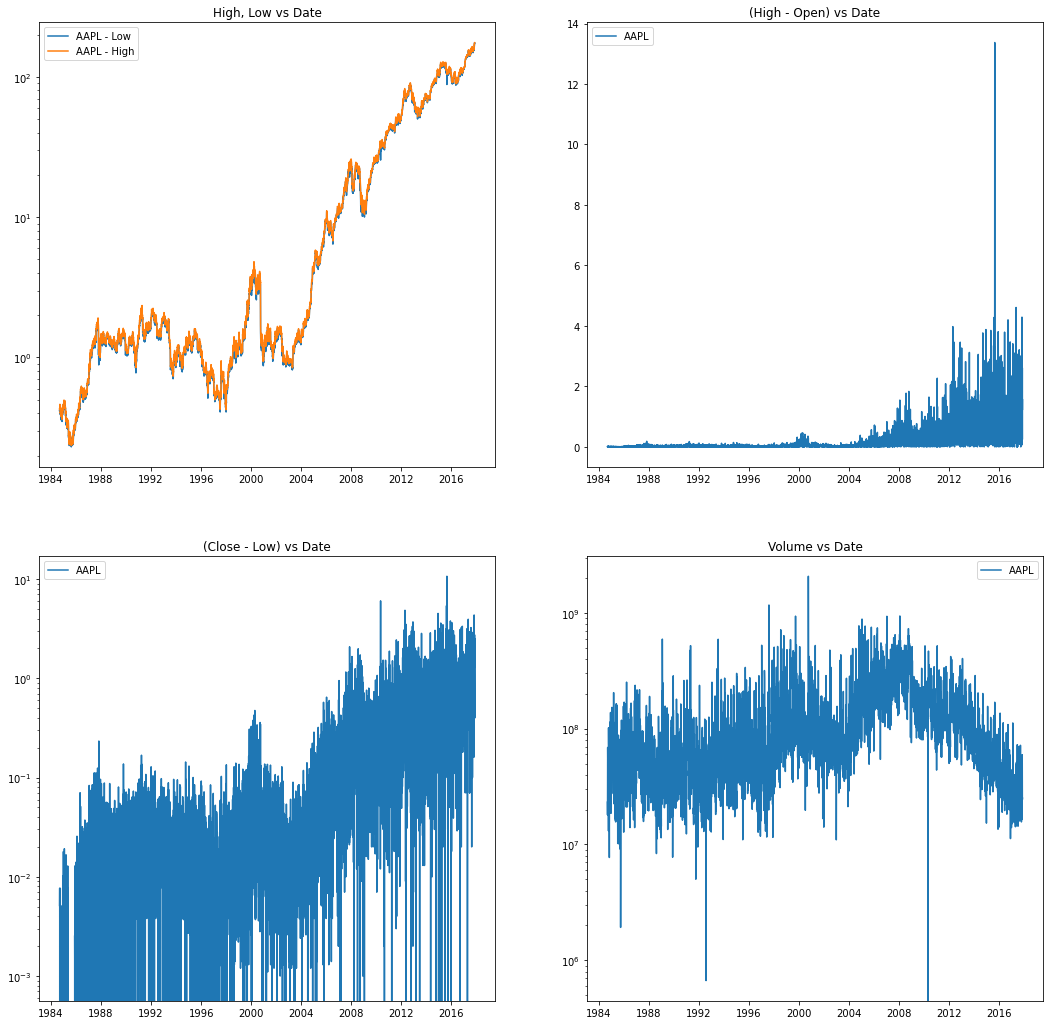

In [248]:
parse_n_plot_stocks(files_subpath, ['AAPL'], plot=True).head(10)

,Date,Stock,Open,High,Low,Close,Volume
0,1962-01-02,GE,0.6277,0.6362,0.6201,0.6201,2575579
1,1962-01-03,GE,0.6201,0.6201,0.6122,0.6201,1764749
2,1962-01-04,GE,0.6201,0.6201,0.6037,0.6122,2194010
3,1962-01-05,GE,0.6122,0.6122,0.5798,0.5957,3255244
4,1962-01-08,GE,0.5957,0.5957,0.5716,0.5957,3696430
5,1962-01-09,GE,0.5957,0.6037,0.5878,0.5957,2778285
6,1962-01-10,GE,0.5957,0.6037,0.5957,0.5957,2337096
7,1962-01-11,GE,0.5957,0.5957,0.5878,0.5957,1943605
8,1962-01-12,GE,0.5957,0.6037,0.5878,0.5878,2015151
9,1962-01-15,GE,0.5957,0.5957,0.5957,0.5957,2527879


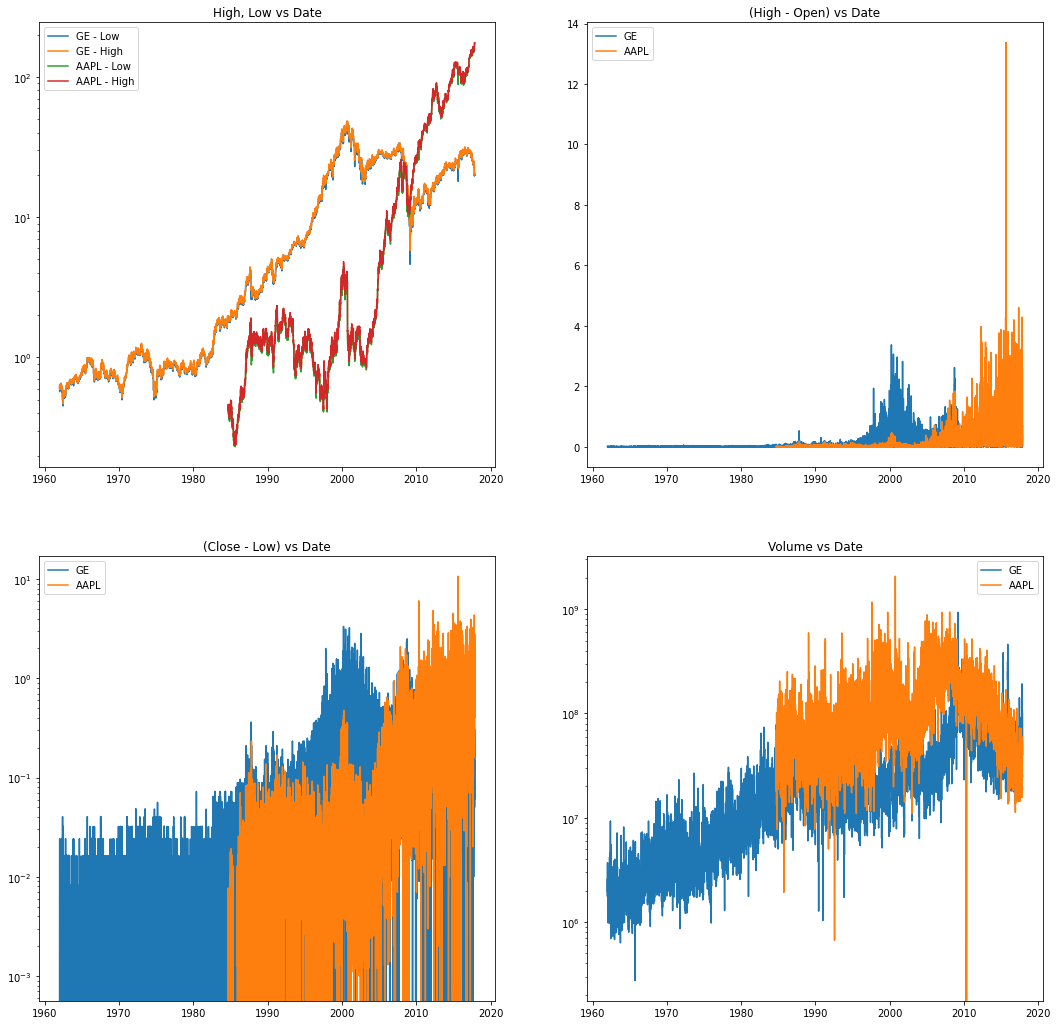

In [249]:
parse_n_plot_stocks(files_subpath, ['GE', 'AAPL'], plot=True).head(10)

## Simple strategy - single stock
- Initially work with AAPL day trading (no intra day trading)
- Utilize sliding windows that divide remaining space (stock dataframe rows) equally (to remaining rows) every time. First, the algorithm checks for buynig stocks at the minimum low price within the window and if not it proceeds to check whether it can sell stocks at the maximum (High) value within the window. It then slides the window and repeats the process readjusting every time the the length of the window according to the remaining space. 

In [277]:
from datetime import date

class MyWallet():  
    """
    Class to handle our wallet that contains BALANCE ($ - static) and STOCKS HELD (their value $ is time dependent)
    """
    def __init__(self, initial_capital, start_date = date(1960, 1, 1)):
        """
        Provided starting date and initial capital available, initialize wallet variable values.
        """
        self.start_date = start_date # keep the start date of the wallet
        self.balance = initial_capital # initial money available $
        self.stocks_held = {} # initially no stocks held
    



class One_stock_strategy_trader:
    def __init__(self, cur_stock_list, N, keep_out_num_of_moves, inverse_selling_rate,\
                 files_subpath, initial_capital = 1):
        self.wallet = MyWallet(initial_capital) #initialize Wallet
        self.num_transactions = 0 #number of transactions
        self.cur_stock = cur_stock_list[0] #current stock id
        self.N = N # number of moves
        self.keep_out_num_of_moves = keep_out_num_of_moves
        self.inverse_selling_rate = inverse_selling_rate
        self.df = parse_n_plot_stocks(files_subpath, cur_stock_list, plot = False) #parse txt file of stock and load in df
        self.dates_list = list(self.df['Date']) # list of dates in Dataframe
        self.cur_start_date = self.dates_list[0] # first date of sliding window
        self.max_date = self.dates_list[-1] # last date of sliding window
        self.remaining_count = len(self.dates_list) # remaining days from cur_start_date until end of dataframe
        self.num_of_remaining_rows = 0 # how many rows (not dates) are left in df from cur_start_date until end of df
        self.num_of_rows_sliding_window = 0 # rows of sliding window
        self.working_df = None # working df -> df that corresponds to sliding window
        self.cur_stocks_held = None # holding current number of stocks at hand
        self.min_buy_low_price = 0
        self.cur_volume_low = 0
        self.cur_date_low = None
        self.max_sell_high_price = 0
        self.cur_volume_high = 0
        self.cur_date_high = None
        self.transactions_list = [] #keep transactions list to save to a txt file
            
    def trader_should_trade(self):
        return (self.cur_start_date < self.max_date) & (self.num_transactions < self.N) #condition to keep trader active
    
    def new_subwindow_df(self):
        self.num_of_remaining_rows = len(self.df[self.df['Date'] >= self.cur_start_date])
        self.num_of_rows_sliding_window = self.num_of_remaining_rows // (self.N - self.num_transactions)
        self.working_df = self.df[self.df['Date'] >= self.cur_start_date]
        self.working_df = self.working_df[: self.num_of_rows_sliding_window]
        self.cur_stocks_held = self.wallet.stocks_held.get(self.cur_stock, 0)
        
    def calculate_low_and_high_prices(self): #calculate low and high prices of sliding window
        row_with_min_buy_low_price = self.working_df[self.working_df['Low'] == self.working_df['Low'].min()].iloc[0] #get row with min buy low price in sliding window
        self.min_buy_low_price = row_with_min_buy_low_price['Low']
        self.cur_volume_low = row_with_min_buy_low_price['Volume']
        self.cur_date_low = row_with_min_buy_low_price['Date']
        
        row_with_max_sell_price = self.working_df[self.working_df['High'] == self.working_df['High'].max()].iloc[0]
        self.max_sell_high_price = row_with_max_sell_price['High']
        self.cur_volume_high = row_with_max_sell_price['Volume']
        self.cur_date_high = row_with_max_sell_price['Date']

    def buy(self): #buy stocks
        max_buy_volume = int(min(self.wallet.balance//self.min_buy_low_price, 
                                 0.1 * self.cur_volume_low, self.cur_stocks_held + 1))
        if max_buy_volume > 0:
            purchases = max_buy_volume * self.min_buy_low_price
            self.num_transactions += 1
                        
            self.wallet.balance -= purchases
            rem_stocks = self.cur_stocks_held + max_buy_volume
            self.wallet.stocks_held[self.cur_stock] = rem_stocks
            self.cur_start_date = self.cur_date_low
                        
            transaction_string = f'{self.cur_date_low.date()} buy-low {self.cur_stock} {max_buy_volume}'
            print(transaction_string)
            #print(transaction_string, f'Stocks held: {self.wallet.stocks_held[self.cur_stock]}')
            self.transactions_list.append(transaction_string)
    
    def sell(self): #sell stocks
        if self.num_transactions < 50: # sell more frequently at start to generate some balance ($) and stocks
            max_sell_volume = int(min(0.1 * self.cur_volume_high, self.cur_stocks_held) // 1)
        else: # then slow down selling (inverse selling rate > 1)
            max_sell_volume = int(min(0.1 * self.cur_volume_high, self.cur_stocks_held) // self.inverse_selling_rate)                
        if max_sell_volume > 0:
            sales = max_sell_volume * self.max_sell_high_price
            self.num_transactions += 1
                        
            self.wallet.balance += sales
            rem_stocks = self.cur_stocks_held - max_sell_volume
            self.wallet.stocks_held[self.cur_stock] = rem_stocks            
            self.cur_start_date = self.cur_date_high
                        
            transaction_string = f'{self.cur_date_high.date()} sell-high {self.cur_stock} {max_sell_volume}'
            print(transaction_string)
            #print(transaction_string, f'Stocks held: {self.wallet.stocks_held[self.cur_stock]}')
            self.transactions_list.append(transaction_string)
 
    def final_sell(self): #sell all stocks that are left in the end
        max_sell_volume = int(min(0.1 * self.cur_volume_high, self.cur_stocks_held))
        if max_sell_volume > 0:
            sales = max_sell_volume * self.max_sell_high_price
            self.num_transactions += 1
            
            
            self.wallet.balance += sales
            rem_stocks = self.cur_stocks_held - max_sell_volume
            self.wallet.stocks_held[self.cur_stock] = rem_stocks
            self.cur_start_date = self.cur_date_high
                        
            transaction_string = f'{self.cur_date_high.date()} sell-high {self.cur_stock} {max_sell_volume}'
            print(transaction_string)
            #print(transaction_string, f'Stocks held: {self.wallet.stocks_held[self.cur_stock]}')
            self.transactions_list.append(transaction_string)



### <= 1000 moves

#### AAPL - 400 moves

In [281]:
trader = One_stock_strategy_trader(['AAPL'], 400, 20, 1.4,  '/stocks_dataset/Stocks')

all_dates = list(pd.date_range(start=trader.wallet.start_date,\
                                       end=trader.df[trader.df['Date'] == trader.df['Date'].max()].iloc[0]['Date']))
balance = []
portfolio = []
index = 0

for date in [d for d in all_dates if d < trader.cur_start_date]:
    balance.append(1)
    portfolio.append(1)
    index += 1


while trader.trader_should_trade():
    
    trader.new_subwindow_df() #calculate new working df in sliding window
    trader.calculate_low_and_high_prices() #calculate low and high prices of sliding window  
    
    start_date = trader.cur_start_date
    start_index = all_dates.index(start_date)
    
    if trader.num_transactions < trader.N - trader.keep_out_num_of_moves: #keep last few (keep out moves) transactions only to sell any remaining stocks
        # buy step
        if trader.wallet.balance > trader.min_buy_low_price: #if you have money left in the balance
            end_date = trader.cur_date_low
            end_index = all_dates.index(end_date)
            trader.buy()        
                                
        # sell step
        elif trader.cur_stocks_held: #if you have at least 1 stock of the current stock
            end_date = trader.cur_date_high
            end_index = all_dates.index(end_date)
            trader.sell()
    else: # case to sell everything
        if trader.cur_stocks_held:# if there are still stcoks after (N - keep_out transactions), then start selling everything
            end_date = trader.cur_date_high
            end_index = all_dates.index(end_date)
            trader.final_sell()
        else: # when you have sold all remaining stocks exit loop
            start_index = index
            end_date = trader.df['Date'].max()
            end_index = all_dates.index(end_date)
            for i in range(start_index, end_index + 1):
                current_date = all_dates[i]
                if len(trader.df[trader.df['Date'] == current_date]) > 0: #if it is in the df
                    previous_balance = balance[-1]
                    balance.append(previous_balance)
                    stock_close_value = trader.df[trader.df['Date'] == current_date]['Close'].iloc[0]
                    stocks_value = stock_close_value * trader.wallet.stocks_held.get(trader.cur_stock, 0)
                    portfolio.append(trader.wallet.balance + stocks_value)
                    index += 1
                else:
                    balance.append(balance[-1])
                    portfolio.append(portfolio[-1])
                    index += 1

            # and last dates from all_dates            
            break
            
               
    for i in range(start_index, end_index): #all previous days from a transaction
        current_date = all_dates[i]
        #print(current_date)
        if len(trader.df[trader.df['Date'] == current_date]) > 0: #if it is in the df
            previous_balance = balance[-1]
            balance.append(previous_balance)
            stock_close_value = trader.df[trader.df['Date'] == current_date]['Close'].iloc[0]
            stocks_value = stock_close_value * trader.wallet.stocks_held.get(trader.cur_stock, 0)
            portfolio.append(trader.wallet.balance + stocks_value)
            index += 1
        else:
            balance.append(balance[-1])
            portfolio.append(portfolio[-1])
            index += 1
 
    # Also add the transaction one
    balance.append(trader.wallet.balance) #update balance
    stock_close_value = trader.df[trader.df['Date'] == all_dates[end_index]]['Close'].iloc[0]
    stocs_value = stock_close_value * trader.wallet.stocks_held.get(trader.cur_stock, 0)
    portfolio.append(trader.wallet.balance + stocks_value)
    index += 1        
    
    trader.cur_start_date = trader.cur_start_date + pd.Timedelta(days=1) # slide date to new start (add 1 day so you are not considering same day again)
    
if os.path.exists(os.getcwd() + f'transactions{trader.cur_stock}{trader.num_transactions}.txt'):
    os.remove(os.getcwd() + f'transactions{trader.cur_stock}{trader.num_transactions}.txt') # remove if exists file for transactions

with open(f'transactions{trader.cur_stock}{trader.num_transactions}.txt', 'a') as f:
    f.write(f'{trader.num_transactions}\n')
    for item in trader.transactions_list:
        f.write(item + '\n')

1984-10-01 buy-low AAPL 1
1984-10-12 buy-low AAPL 1
1984-10-19 sell-high AAPL 2
1984-11-09 buy-low AAPL 1
1984-11-19 buy-low AAPL 2
1984-12-18 sell-high AAPL 3
1984-12-21 buy-low AAPL 1
1984-12-24 buy-low AAPL 2
1985-01-15 sell-high AAPL 3
1985-01-18 buy-low AAPL 1
1985-02-15 buy-low AAPL 2
1985-02-19 sell-high AAPL 3
1985-03-08 buy-low AAPL 1
1985-04-08 buy-low AAPL 2
1985-05-02 buy-low AAPL 2
1985-05-20 sell-high AAPL 5
1985-06-14 buy-low AAPL 1
1985-06-17 buy-low AAPL 2
1985-06-18 buy-low AAPL 4
1985-06-27 sell-high AAPL 7
1985-07-29 buy-low AAPL 1
1985-08-15 buy-low AAPL 2
1985-08-16 buy-low AAPL 4
1985-08-23 buy-low AAPL 2
1985-09-24 sell-high AAPL 9
1985-10-04 buy-low AAPL 1
1985-10-07 buy-low AAPL 2
1985-10-09 buy-low AAPL 4
1985-10-10 buy-low AAPL 3
1985-11-08 sell-high AAPL 10
1985-11-22 buy-low AAPL 1
1985-11-25 buy-low AAPL 2
1985-11-26 buy-low AAPL 4
1985-11-27 buy-low AAPL 4
1985-12-18 sell-high AAPL 11
1985-12-23 buy-low AAPL 1
1985-12-24 buy-low AAPL 2
1985-12-26 buy-low

2000-03-01 sell-high AAPL 337674
2000-04-12 buy-low AAPL 135071
2000-06-01 buy-low AAPL 270142
2000-06-13 buy-low AAPL 98896
2000-07-13 sell-high AAPL 456556
2000-08-03 buy-low AAPL 182624
2000-10-03 buy-low AAPL 365248
2000-11-30 buy-low AAPL 712638
2000-12-20 buy-low AAPL 1
2001-01-31 sell-high AAPL 1030810
2001-03-01 buy-low AAPL 412325
2001-03-12 buy-low AAPL 824650
2001-03-13 buy-low AAPL 63641
2001-04-30 sell-high AAPL 1223528
2001-05-30 buy-low AAPL 489413
2001-07-26 buy-low AAPL 978826
2001-09-21 buy-low AAPL 425930
2001-11-20 sell-high AAPL 1702557
2001-11-21 buy-low AAPL 681025
2001-11-23 buy-low AAPL 1086077
2002-01-30 sell-high AAPL 1748661
2002-02-27 buy-low AAPL 699466
2002-02-28 buy-low AAPL 1290294
2002-04-17 sell-high AAPL 1920875
2002-06-21 buy-low AAPL 768351
2002-07-26 buy-low AAPL 1536702
2002-08-05 buy-low AAPL 1157801
2002-08-19 sell-high AAPL 3022288
2002-10-08 buy-low AAPL 1208917
2002-10-09 buy-low AAPL 2417834
2002-10-10 buy-low AAPL 36344
2002-11-04 sell-hig

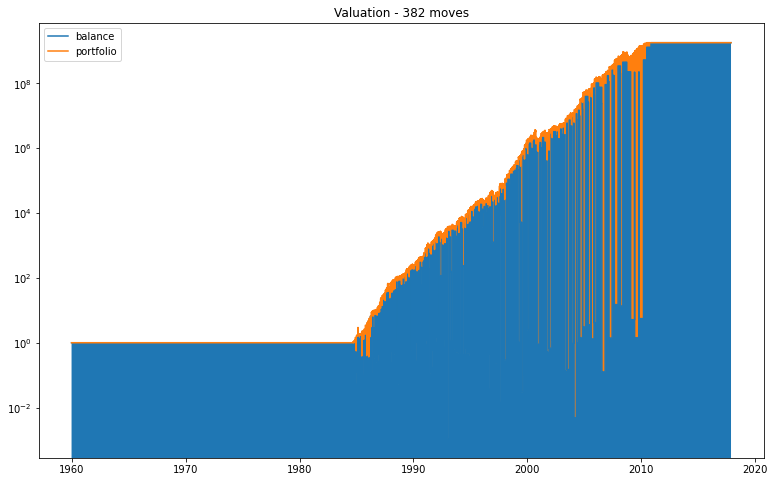

In [282]:
plot_balance_portfolio(all_dates, balance, portfolio)

In [283]:
trader.num_transactions, balance[-1] / (1e+9), portfolio[-1] / (1e+9), balance[-1] == portfolio[-1]

(382, 1.79339943190104, 1.79339943190104, True)

#### MSFT - 400 moves

In [284]:
trader = One_stock_strategy_trader(['MSFT'], 400, 20, 1.4,  '/stocks_dataset/Stocks')

all_dates = list(pd.date_range(start=trader.wallet.start_date,\
                                       end=trader.df[trader.df['Date'] == trader.df['Date'].max()].iloc[0]['Date']))
balance = []
portfolio = []
index = 0

for date in [d for d in all_dates if d < trader.cur_start_date]:
    balance.append(1)
    portfolio.append(1)
    index += 1


while trader.trader_should_trade():
    
    trader.new_subwindow_df() #calculate new working df in sliding window
    trader.calculate_low_and_high_prices() #calculate low and high prices of sliding window  
    
    start_date = trader.cur_start_date
    start_index = all_dates.index(start_date)
    
    if trader.num_transactions < trader.N - trader.keep_out_num_of_moves: #keep last few (keep out moves) transactions only to sell any remaining stocks
        # buy step
        if trader.wallet.balance > trader.min_buy_low_price: #if you have money left in the balance
            end_date = trader.cur_date_low
            end_index = all_dates.index(end_date)
            trader.buy()        
                                
        # sell step
        elif trader.cur_stocks_held: #if you have at least 1 stock of the current stock
            end_date = trader.cur_date_high
            end_index = all_dates.index(end_date)
            trader.sell()
    else: # case to sell everything
        if trader.cur_stocks_held:# if there are still stcoks after (N - keep_out transactions), then start selling everything
            end_date = trader.cur_date_high
            end_index = all_dates.index(end_date)
            trader.final_sell()
        else: # when you have sold all remaining stocks exit loop
            start_index = index
            end_date = trader.df['Date'].max()
            end_index = all_dates.index(end_date)
            for i in range(start_index, end_index + 1):
                current_date = all_dates[i]
                if len(trader.df[trader.df['Date'] == current_date]) > 0: #if it is in the df
                    previous_balance = balance[-1]
                    balance.append(previous_balance)
                    stock_close_value = trader.df[trader.df['Date'] == current_date]['Close'].iloc[0]
                    stocks_value = stock_close_value * trader.wallet.stocks_held.get(trader.cur_stock, 0)
                    portfolio.append(trader.wallet.balance + stocks_value)
                    index += 1
                else:
                    balance.append(balance[-1])
                    portfolio.append(portfolio[-1])
                    index += 1

            # and last dates from all_dates            
            break
            
               
    for i in range(start_index, end_index): #all previous days from a transaction
        current_date = all_dates[i]
        #print(current_date)
        if len(trader.df[trader.df['Date'] == current_date]) > 0: #if it is in the df
            previous_balance = balance[-1]
            balance.append(previous_balance)
            stock_close_value = trader.df[trader.df['Date'] == current_date]['Close'].iloc[0]
            stocks_value = stock_close_value * trader.wallet.stocks_held.get(trader.cur_stock, 0)
            portfolio.append(trader.wallet.balance + stocks_value)
            index += 1
        else:
            balance.append(balance[-1])
            portfolio.append(portfolio[-1])
            index += 1
 
    # Also add the transaction one
    balance.append(trader.wallet.balance) #update balance
    stock_close_value = trader.df[trader.df['Date'] == all_dates[end_index]]['Close'].iloc[0]
    stocs_value = stock_close_value * trader.wallet.stocks_held.get(trader.cur_stock, 0)
    portfolio.append(trader.wallet.balance + stocks_value)
    index += 1        
    
    trader.cur_start_date = trader.cur_start_date + pd.Timedelta(days=1) # slide date to new start (add 1 day so you are not considering same day again)

1986-03-13 buy-low MSFT 1
1986-03-20 buy-low MSFT 2
1986-03-21 buy-low MSFT 4
1986-03-24 buy-low MSFT 7
1986-03-26 sell-high MSFT 14
1986-03-27 buy-low MSFT 1
1986-03-31 buy-low MSFT 2
1986-04-01 buy-low MSFT 4
1986-04-02 buy-low MSFT 8
1986-04-07 buy-low MSFT 1
1986-04-25 sell-high MSFT 16
1986-04-28 buy-low MSFT 1
1986-04-29 buy-low MSFT 2
1986-04-30 buy-low MSFT 4
1986-05-01 buy-low MSFT 8
1986-05-02 buy-low MSFT 3
1986-05-29 sell-high MSFT 18
1986-06-26 buy-low MSFT 1
1986-07-10 buy-low MSFT 2
1986-07-11 buy-low MSFT 4
1986-07-14 buy-low MSFT 8
1986-07-15 buy-low MSFT 9
1986-07-22 sell-high MSFT 24
1986-08-06 buy-low MSFT 1
1986-08-07 buy-low MSFT 2
1986-09-03 buy-low MSFT 4
1986-09-04 buy-low MSFT 8
1986-09-05 buy-low MSFT 13
1986-09-08 sell-high MSFT 28
1986-09-09 buy-low MSFT 1
1986-09-10 buy-low MSFT 2
1986-09-11 buy-low MSFT 4
1986-09-12 buy-low MSFT 8
1986-09-15 buy-low MSFT 16
1986-10-09 sell-high MSFT 31
1986-10-10 buy-low MSFT 1
1986-10-13 buy-low MSFT 2
1986-10-14 buy-low

1999-08-10 buy-low MSFT 14269
1999-08-12 buy-low MSFT 28538
1999-08-16 buy-low MSFT 1208
1999-09-20 sell-high MSFT 41630
1999-11-08 buy-low MSFT 16654
1999-11-19 buy-low MSFT 31645
1999-12-30 sell-high MSFT 46394
2000-02-28 buy-low MSFT 18559
2000-04-24 buy-low MSFT 37118
2000-05-26 buy-low MSFT 25120
2000-07-07 sell-high MSFT 70967
2000-07-26 buy-low MSFT 28389
2000-09-27 buy-low MSFT 56778
2000-10-18 buy-low MSFT 11911
2000-12-21 buy-low MSFT 1
2001-02-07 sell-high MSFT 89619
2001-03-21 buy-low MSFT 35849
2001-03-22 buy-low MSFT 71698
2001-04-04 buy-low MSFT 8354
2001-06-07 sell-high MSFT 108392
2001-08-10 buy-low MSFT 43358
2001-09-21 buy-low MSFT 86716
2001-09-27 buy-low MSFT 23939
2001-11-14 sell-high MSFT 140978
2001-11-28 buy-low MSFT 56393
2002-02-07 buy-low MSFT 102074
2002-03-11 sell-high MSFT 153470
2002-05-07 buy-low MSFT 61390
2002-07-15 buy-low MSFT 122780
2002-07-24 buy-low MSFT 26905
2002-08-22 sell-high MSFT 194617
2002-09-30 buy-low MSFT 77848
2002-10-01 buy-low MSFT 

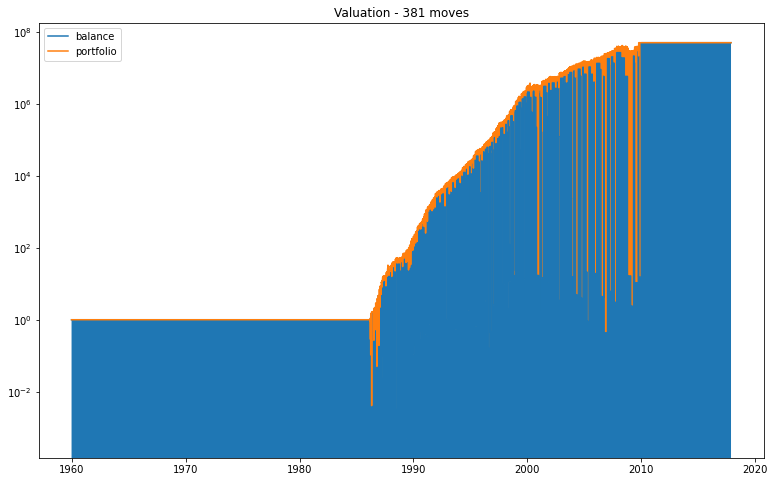

In [285]:
plot_balance_portfolio(all_dates, balance, portfolio)

In [286]:
trader.num_transactions, balance[-1] / (1e+9), portfolio[-1] / (1e+9), balance[-1] == portfolio[-1]

(381, 0.049099900342810004, 0.049099900342810004, True)

**Conclusion: AAPL was more profitable than MSFT**

## AAPL with 7000 moves

In [308]:
trader = One_stock_strategy_trader(['AAPL'], 7000, 200, 1.4,  '/stocks_dataset/Stocks')

all_dates = list(pd.date_range(start=trader.wallet.start_date,\
                                       end=trader.df[trader.df['Date'] == trader.df['Date'].max()].iloc[0]['Date']))
balance = []
portfolio = []
index = 0

for date in [d for d in all_dates if d < trader.cur_start_date]:
    balance.append(1)
    portfolio.append(1)
    index += 1


while trader.trader_should_trade():
    
    trader.new_subwindow_df() #calculate new working df in sliding window
    trader.calculate_low_and_high_prices() #calculate low and high prices of sliding window  
    
    start_date = trader.cur_start_date
    start_index = all_dates.index(start_date)
    
    if trader.num_transactions < trader.N - trader.keep_out_num_of_moves: #keep last few (keep out moves) transactions only to sell any remaining stocks
        # buy step
        if trader.wallet.balance > trader.min_buy_low_price: #if you have money left in the balance
            end_date = trader.cur_date_low
            end_index = all_dates.index(end_date)
            trader.buy()        
                                
        # sell step
        elif trader.cur_stocks_held: #if you have at least 1 stock of the current stock
            end_date = trader.cur_date_high
            end_index = all_dates.index(end_date)
            trader.sell()
    else: # case to sell everything
        if trader.cur_stocks_held:# if there are still stcoks after (N - keep_out transactions), then start selling everything
            end_date = trader.cur_date_high
            end_index = all_dates.index(end_date)
            trader.final_sell()
        else: # when you have sold all remaining stocks exit loop
            start_index = index
            end_date = trader.df['Date'].max()
            end_index = all_dates.index(end_date)
            for i in range(start_index, end_index + 1):
                current_date = all_dates[i]
                if len(trader.df[trader.df['Date'] == current_date]) > 0: #if it is in the df
                    previous_balance = balance[-1]
                    balance.append(previous_balance)
                    stock_close_value = trader.df[trader.df['Date'] == current_date]['Close'].iloc[0]
                    stocks_value = stock_close_value * trader.wallet.stocks_held.get(trader.cur_stock, 0)
                    portfolio.append(trader.wallet.balance + stocks_value)
                    index += 1
                else:
                    balance.append(balance[-1])
                    portfolio.append(portfolio[-1])
                    index += 1

            # and last dates from all_dates            
            break
            
               
    for i in range(start_index, end_index): #all previous days from a transaction
        current_date = all_dates[i]
        #print(current_date)
        if len(trader.df[trader.df['Date'] == current_date]) > 0: #if it is in the df
            previous_balance = balance[-1]
            balance.append(previous_balance)
            stock_close_value = trader.df[trader.df['Date'] == current_date]['Close'].iloc[0]
            stocks_value = stock_close_value * trader.wallet.stocks_held.get(trader.cur_stock, 0)
            portfolio.append(trader.wallet.balance + stocks_value)
            index += 1
        else:
            balance.append(balance[-1])
            portfolio.append(portfolio[-1])
            index += 1
 
    # Also add the transaction one
    balance.append(trader.wallet.balance) #update balance
    stock_close_value = trader.df[trader.df['Date'] == all_dates[end_index]]['Close'].iloc[0]
    stocs_value = stock_close_value * trader.wallet.stocks_held.get(trader.cur_stock, 0)
    portfolio.append(trader.wallet.balance + stocks_value)
    index += 1        
    
    trader.cur_start_date = trader.cur_start_date + pd.Timedelta(days=1) # slide date to new start (add 1 day so you are not considering same day again)
    
if os.path.exists(os.getcwd() + f'transactions{trader.cur_stock}{trader.num_transactions}.txt'):
    os.remove(os.getcwd() + f'transactions{trader.cur_stock}{trader.num_transactions}.txt') # remove if exists file for transactions

with open(f'transactions{trader.cur_stock}{trader.num_transactions}.txt', 'a') as f:
    f.write(f'{trader.num_transactions}\n')
    for item in trader.transactions_list:
        f.write(item + '\n')

1984-09-07 buy-low AAPL 1
1984-09-10 buy-low AAPL 1
1984-09-11 sell-high AAPL 2
1984-09-12 buy-low AAPL 1
1984-09-13 buy-low AAPL 1
1984-09-14 sell-high AAPL 2
1984-09-17 buy-low AAPL 1
1984-09-18 buy-low AAPL 1
1984-09-19 sell-high AAPL 2
1984-09-20 buy-low AAPL 1
1984-09-21 buy-low AAPL 1
1984-09-24 sell-high AAPL 2
1984-09-25 buy-low AAPL 1
1984-09-26 buy-low AAPL 1
1984-09-27 sell-high AAPL 2
1984-09-28 buy-low AAPL 1
1984-10-01 buy-low AAPL 1
1984-10-02 sell-high AAPL 2
1984-10-03 buy-low AAPL 1
1984-10-04 buy-low AAPL 1
1984-10-05 sell-high AAPL 2
1984-10-08 buy-low AAPL 1
1984-10-09 buy-low AAPL 1
1984-10-10 sell-high AAPL 2
1984-10-11 buy-low AAPL 1
1984-10-12 buy-low AAPL 2
1984-10-15 sell-high AAPL 3
1984-10-16 buy-low AAPL 1
1984-10-17 buy-low AAPL 2
1984-10-18 sell-high AAPL 3
1984-10-19 buy-low AAPL 1
1984-10-22 buy-low AAPL 2
1984-10-23 sell-high AAPL 3
1984-10-24 buy-low AAPL 1
1984-10-25 buy-low AAPL 2
1984-10-26 sell-high AAPL 3
1984-10-29 buy-low AAPL 1
1984-10-30 buy

1985-12-06 sell-high AAPL 9
1985-12-09 buy-low AAPL 5
1985-12-10 buy-low AAPL 5
1985-12-11 sell-high AAPL 10
1985-12-12 buy-low AAPL 5
1985-12-13 buy-low AAPL 5
1985-12-16 sell-high AAPL 10
1985-12-17 buy-low AAPL 5
1985-12-18 buy-low AAPL 5
1985-12-19 sell-high AAPL 10
1985-12-20 buy-low AAPL 5
1985-12-23 buy-low AAPL 5
1985-12-24 sell-high AAPL 10
1985-12-26 buy-low AAPL 5
1985-12-27 buy-low AAPL 6
1985-12-30 sell-high AAPL 10
1985-12-31 buy-low AAPL 6
1986-01-02 buy-low AAPL 4
1986-01-03 sell-high AAPL 10
1986-01-06 buy-low AAPL 6
1986-01-07 buy-low AAPL 4
1986-01-08 sell-high AAPL 10
1986-01-09 buy-low AAPL 6
1986-01-10 buy-low AAPL 5
1986-01-13 sell-high AAPL 11
1986-01-14 buy-low AAPL 6
1986-01-15 buy-low AAPL 5
1986-01-16 sell-high AAPL 11
1986-01-17 buy-low AAPL 6
1986-01-20 buy-low AAPL 5
1986-01-21 sell-high AAPL 11
1986-01-22 buy-low AAPL 6
1986-01-23 buy-low AAPL 6
1986-01-24 sell-high AAPL 12
1986-01-27 buy-low AAPL 6
1986-01-28 buy-low AAPL 7
1986-01-29 sell-high AAPL 12


1987-02-18 buy-low AAPL 31
1987-02-19 buy-low AAPL 47
1987-02-20 sell-high AAPL 77
1987-02-23 buy-low AAPL 32
1987-02-24 buy-low AAPL 46
1987-02-25 sell-high AAPL 77
1987-02-26 buy-low AAPL 33
1987-02-27 buy-low AAPL 45
1987-03-02 sell-high AAPL 78
1987-03-03 buy-low AAPL 33
1987-03-04 buy-low AAPL 52
1987-03-05 sell-high AAPL 83
1987-03-06 buy-low AAPL 35
1987-03-09 buy-low AAPL 53
1987-03-10 sell-high AAPL 87
1987-03-11 buy-low AAPL 36
1987-03-12 buy-low AAPL 54
1987-03-13 sell-high AAPL 89
1987-03-16 buy-low AAPL 37
1987-03-17 buy-low AAPL 54
1987-03-18 sell-high AAPL 90
1987-03-19 buy-low AAPL 38
1987-03-20 buy-low AAPL 53
1987-03-23 sell-high AAPL 91
1987-03-24 buy-low AAPL 38
1987-03-25 buy-low AAPL 56
1987-03-26 sell-high AAPL 93
1987-03-27 buy-low AAPL 39
1987-03-30 buy-low AAPL 61
1987-03-31 sell-high AAPL 98
1987-04-01 buy-low AAPL 41
1987-04-02 buy-low AAPL 57
1987-04-03 sell-high AAPL 98
1987-04-06 buy-low AAPL 41
1987-04-07 buy-low AAPL 62
1987-04-08 sell-high AAPL 102
198

1988-04-15 buy-low AAPL 1076
1988-04-18 sell-high AAPL 1667
1988-04-19 buy-low AAPL 669
1988-04-20 buy-low AAPL 1048
1988-04-21 sell-high AAPL 1703
1988-04-22 buy-low AAPL 683
1988-04-25 buy-low AAPL 1048
1988-04-26 sell-high AAPL 1723
1988-04-27 buy-low AAPL 691
1988-04-28 buy-low AAPL 1049
1988-04-29 sell-high AAPL 1735
1988-05-02 buy-low AAPL 696
1988-05-03 buy-low AAPL 1076
1988-05-04 sell-high AAPL 1762
1988-05-05 buy-low AAPL 706
1988-05-06 buy-low AAPL 1132
1988-05-09 sell-high AAPL 1816
1988-05-10 buy-low AAPL 728
1988-05-11 buy-low AAPL 1153
1988-05-12 sell-high AAPL 1862
1988-05-13 buy-low AAPL 747
1988-05-16 buy-low AAPL 1126
1988-05-17 sell-high AAPL 1870
1988-05-18 buy-low AAPL 750
1988-05-19 buy-low AAPL 1271
1988-05-20 sell-high AAPL 1978
1988-05-23 buy-low AAPL 793
1988-05-24 buy-low AAPL 1285
1988-05-25 sell-high AAPL 2050
1988-05-26 buy-low AAPL 821
1988-05-27 buy-low AAPL 1280
1988-05-31 sell-high AAPL 2086
1988-06-01 buy-low AAPL 836
1988-06-02 buy-low AAPL 1256
198

1989-06-02 sell-high AAPL 9702
1989-06-05 buy-low AAPL 3882
1989-06-06 buy-low AAPL 6488
1989-06-07 sell-high AAPL 10179
1989-06-08 buy-low AAPL 4073
1989-06-09 buy-low AAPL 6477
1989-06-12 sell-high AAPL 10444
1989-06-13 buy-low AAPL 4179
1989-06-14 buy-low AAPL 6267
1989-06-15 sell-high AAPL 10445
1989-06-16 buy-low AAPL 4180
1989-06-19 buy-low AAPL 7765
1989-06-20 sell-high AAPL 11517
1989-06-21 buy-low AAPL 4608
1989-06-22 buy-low AAPL 7429
1989-06-23 sell-high AAPL 11888
1989-06-26 buy-low AAPL 4757
1989-06-27 buy-low AAPL 7538
1989-06-28 sell-high AAPL 12179
1989-06-29 buy-low AAPL 4873
1989-06-30 buy-low AAPL 8085
1989-07-03 sell-high AAPL 12735
1989-07-05 buy-low AAPL 5096
1989-07-06 buy-low AAPL 8146
1989-07-07 sell-high AAPL 13097
1989-07-10 buy-low AAPL 5241
1989-07-11 buy-low AAPL 8562
1989-07-12 sell-high AAPL 13602
1989-07-13 buy-low AAPL 5442
1989-07-14 buy-low AAPL 8356
1989-07-17 sell-high AAPL 13742
1989-07-18 buy-low AAPL 5498
1989-07-19 buy-low AAPL 9068
1989-07-20 

1990-07-23 buy-low AAPL 43872
1990-07-24 buy-low AAPL 70820
1990-07-25 sell-high AAPL 113259
1990-07-26 buy-low AAPL 45305
1990-07-27 buy-low AAPL 75078
1990-07-30 sell-high AAPL 118347
1990-07-31 buy-low AAPL 47341
1990-08-01 buy-low AAPL 73722
1990-08-02 sell-high AAPL 120287
1990-08-03 buy-low AAPL 48117
1990-08-06 buy-low AAPL 87081
1990-08-07 sell-high AAPL 130938
1990-08-08 buy-low AAPL 52377
1990-08-09 buy-low AAPL 82726
1990-08-10 sell-high AAPL 133913
1990-08-13 buy-low AAPL 53567
1990-08-14 buy-low AAPL 82197
1990-08-15 sell-high AAPL 135235
1990-08-16 buy-low AAPL 54096
1990-08-17 buy-low AAPL 93957
1990-08-20 sell-high AAPL 144391
1990-08-21 buy-low AAPL 57758
1990-08-22 buy-low AAPL 96972
1990-08-23 sell-high AAPL 151776
1990-08-24 buy-low AAPL 60712
1990-08-27 buy-low AAPL 88372
1990-08-28 sell-high AAPL 149853
1990-08-29 buy-low AAPL 59943
1990-08-30 buy-low AAPL 98636
1990-08-31 sell-high AAPL 156086
1990-09-04 buy-low AAPL 62436
1990-09-05 buy-low AAPL 98831
1990-09-06

1991-08-20 buy-low AAPL 1236742
1991-08-21 sell-high AAPL 1907136
1991-08-22 buy-low AAPL 762856
1991-08-23 buy-low AAPL 1179099
1991-08-26 sell-high AAPL 1932007
1991-08-27 buy-low AAPL 772804
1991-08-28 buy-low AAPL 1179152
1991-08-29 sell-high AAPL 1946256
1991-08-30 buy-low AAPL 778504
1991-09-03 buy-low AAPL 1234412
1991-09-04 sell-high AAPL 1993870
1991-09-05 buy-low AAPL 797550
1991-09-06 buy-low AAPL 1281908
1991-09-09 sell-high AAPL 2055005
1991-09-10 buy-low AAPL 822003
1991-09-11 buy-low AAPL 1395219
1991-09-12 sell-high AAPL 2170874
1991-09-13 buy-low AAPL 868351
1991-09-16 buy-low AAPL 1487110
1991-09-17 sell-high AAPL 2302722
1991-09-18 buy-low AAPL 921090
1991-09-19 buy-low AAPL 1376809
1991-09-20 sell-high AAPL 2299277
1991-09-23 buy-low AAPL 919712
1991-09-24 buy-low AAPL 1492095
1991-09-25 sell-high AAPL 1084966
1991-09-26 buy-low AAPL 1117888
1991-09-27 sell-high AAPL 1251180
1991-09-30 buy-low AAPL 1296164
1991-10-01 sell-high AAPL 2435302
1991-10-02 buy-low AAPL 50

1992-08-20 sell-high AAPL 2169487
1992-08-21 buy-low AAPL 2218930
1992-08-24 sell-high AAPL 3031346
1992-08-25 buy-low AAPL 3137786
1992-08-26 sell-high AAPL 2411557
1992-08-27 buy-low AAPL 2307634
1992-08-28 buy-low AAPL 118359
1992-08-31 sell-high AAPL 2412672
1992-09-01 buy-low AAPL 1681374
1992-09-02 buy-low AAPL 744589
1992-09-03 sell-high AAPL 4220281
1992-09-04 buy-low AAPL 1763522
1992-09-08 buy-low AAPL 1952181
1992-09-09 buy-low AAPL 725125
1992-09-10 sell-high AAPL 4545347
1992-09-11 buy-low AAPL 4736567
1992-09-14 sell-high AAPL 4276504
1992-09-15 buy-low AAPL 4477056
1992-09-16 sell-high AAPL 3560109
1992-09-17 buy-low AAPL 3782769
1992-09-18 sell-high AAPL 2302904
1992-09-21 buy-low AAPL 2334952
1992-09-22 sell-high AAPL 2221917
1992-09-23 buy-low AAPL 2282451
1992-09-24 sell-high AAPL 2503031
1992-09-25 buy-low AAPL 2641781
1992-09-28 sell-high AAPL 2978471
1992-09-29 buy-low AAPL 3046351
1992-09-30 sell-high AAPL 1993010
1992-10-01 buy-low AAPL 2050709
1992-10-02 sell-h

1993-08-19 buy-low AAPL 4065331
1993-08-20 sell-high AAPL 1990778
1993-08-23 buy-low AAPL 2026259
1993-08-24 sell-high AAPL 2017105
1993-08-25 buy-low AAPL 2168264
1993-08-26 sell-high AAPL 3508795
1993-08-27 buy-low AAPL 3643283
1993-08-30 sell-high AAPL 5452944
1993-08-31 buy-low AAPL 3566088
1993-09-01 buy-low AAPL 2006542
1993-09-02 sell-high AAPL 5622728
1993-09-03 buy-low AAPL 4544054
1993-09-07 buy-low AAPL 1275841
1993-09-08 sell-high AAPL 4514559
1993-09-09 buy-low AAPL 4170172
1993-09-10 buy-low AAPL 531083
1993-09-13 sell-high AAPL 5095305
1993-09-14 buy-low AAPL 5622543
1993-09-15 sell-high AAPL 5133902
1993-09-16 buy-low AAPL 2397278
1993-09-17 buy-low AAPL 2897389
1993-09-20 sell-high AAPL 2211876
1993-09-21 buy-low AAPL 2363751
1993-09-22 sell-high AAPL 2200945
1993-09-23 buy-low AAPL 2294746
1993-09-24 sell-high AAPL 1525379
1993-09-27 buy-low AAPL 1588281
1993-09-28 sell-high AAPL 1883464
1993-09-29 buy-low AAPL 1981772
1993-09-30 sell-high AAPL 5476147
1993-10-01 buy-

1994-08-24 buy-low AAPL 4455273
1994-08-25 sell-high AAPL 5952033
1994-08-26 buy-low AAPL 5694747
1994-08-29 buy-low AAPL 453524
1994-08-30 sell-high AAPL 3627041
1994-08-31 buy-low AAPL 3692302
1994-09-01 sell-high AAPL 4069461
1994-09-02 buy-low AAPL 2825197
1994-09-06 buy-low AAPL 1332510
1994-09-07 sell-high AAPL 4061652
1994-09-08 buy-low AAPL 4175317
1994-09-09 sell-high AAPL 3132192
1994-09-12 buy-low AAPL 2525030
1994-09-13 buy-low AAPL 657121
1994-09-14 sell-high AAPL 1973821
1994-09-15 buy-low AAPL 2009629
1994-09-16 sell-high AAPL 7253860
1994-09-19 buy-low AAPL 4862337
1994-09-20 buy-low AAPL 2831272
1994-09-21 sell-high AAPL 4678096
1994-09-22 buy-low AAPL 4078341
1994-09-23 buy-low AAPL 733220
1994-09-26 sell-high AAPL 2822743
1994-09-27 buy-low AAPL 2913544
1994-09-28 sell-high AAPL 1618859
1994-09-29 buy-low AAPL 1667300
1994-09-30 sell-high AAPL 1428326
1994-10-03 buy-low AAPL 1516094
1994-10-04 sell-high AAPL 3234820
1994-10-05 buy-low AAPL 3292898
1994-10-06 sell-hig

1995-08-24 sell-high AAPL 5735620
1995-08-25 buy-low AAPL 3746625
1995-08-28 buy-low AAPL 2280128
1995-08-29 sell-high AAPL 6315919
1995-08-30 buy-low AAPL 4280118
1995-08-31 buy-low AAPL 2057016
1995-09-01 sell-high AAPL 1959767
1995-09-05 buy-low AAPL 1994555
1995-09-06 sell-high AAPL 3999182
1995-09-07 buy-low AAPL 4034573
1995-09-08 sell-high AAPL 3481576
1995-09-11 buy-low AAPL 3531728
1995-09-12 sell-high AAPL 6499090
1995-09-13 buy-low AAPL 6943253
1995-09-14 sell-high AAPL 10967243
1995-09-15 buy-low AAPL 12847039
1995-09-18 sell-high AAPL 12380176
1995-09-19 buy-low AAPL 12628571
1995-09-20 sell-high AAPL 6410516
1995-09-21 buy-low AAPL 6585974
1995-09-22 sell-high AAPL 7941028
1995-09-25 buy-low AAPL 7905879
1995-09-26 sell-high AAPL 4998030
1995-09-27 buy-low AAPL 5447170
1995-09-28 sell-high AAPL 6597257
1995-09-29 buy-low AAPL 6776044
1995-10-02 sell-high AAPL 7808725
1995-10-03 buy-low AAPL 8082654
1995-10-04 buy-low AAPL 13625
1995-10-05 sell-high AAPL 4861936
1995-10-06

1996-09-12 buy-low AAPL 3152695
1996-09-13 sell-high AAPL 3318930
1996-09-16 buy-low AAPL 3300489
1996-09-17 sell-high AAPL 4166735
1996-09-18 buy-low AAPL 4211110
1996-09-19 sell-high AAPL 2379876
1996-09-20 buy-low AAPL 2471962
1996-09-23 sell-high AAPL 911613
1996-09-24 buy-low AAPL 932754
1996-09-25 sell-high AAPL 2172165
1996-09-26 buy-low AAPL 2211837
1996-09-27 sell-high AAPL 1624884
1996-09-30 buy-low AAPL 1641626
1996-10-01 sell-high AAPL 10741906
1996-10-02 buy-low AAPL 7720018
1996-10-03 buy-low AAPL 3914258
1996-10-04 sell-high AAPL 2658536
1996-10-07 buy-low AAPL 2669334
1996-10-08 buy-low AAPL 17244
1996-10-09 sell-high AAPL 1697392
1996-10-10 buy-low AAPL 1689358
1996-10-11 sell-high AAPL 2404195
1996-10-14 buy-low AAPL 2443852
1996-10-15 sell-high AAPL 7232217
1996-10-16 buy-low AAPL 7597128
1996-10-17 sell-high AAPL 20450606
1996-10-18 buy-low AAPL 10671717
1996-10-21 buy-low AAPL 5232159
1996-10-22 buy-low AAPL 5960244
1996-10-23 buy-low AAPL 498686
1996-10-24 sell-hi

1997-09-17 buy-low AAPL 2419767
1997-09-18 buy-low AAPL 314933
1997-09-19 sell-high AAPL 1891051
1997-09-22 buy-low AAPL 1904204
1997-09-23 sell-high AAPL 3994720
1997-09-24 buy-low AAPL 4157686
1997-09-25 sell-high AAPL 4449858
1997-09-26 buy-low AAPL 4584104
1997-09-29 sell-high AAPL 3331425
1997-09-30 buy-low AAPL 3415886
1997-10-01 sell-high AAPL 2598966
1997-10-02 buy-low AAPL 2647229
1997-10-03 sell-high AAPL 3231697
1997-10-06 buy-low AAPL 2601867
1997-10-07 buy-low AAPL 706774
1997-10-08 sell-high AAPL 2168148
1997-10-09 buy-low AAPL 2237273
1997-10-10 sell-high AAPL 5386458
1997-10-13 buy-low AAPL 4423798
1997-10-14 buy-low AAPL 1109964
1997-10-15 sell-high AAPL 16152683
1997-10-16 buy-low AAPL 19156091
1997-10-17 sell-high AAPL 8738409
1997-10-20 buy-low AAPL 9899334
1997-10-21 sell-high AAPL 9467521
1997-10-22 buy-low AAPL 4216087
1997-10-23 buy-low AAPL 5209044
1997-10-24 buy-low AAPL 757320
1997-10-27 sell-high AAPL 6560891
1997-10-28 buy-low AAPL 7486178
1997-10-29 sell-h

1998-09-18 sell-high AAPL 6077196
1998-09-21 buy-low AAPL 6324971
1998-09-22 sell-high AAPL 5138141
1998-09-23 buy-low AAPL 5284330
1998-09-24 sell-high AAPL 9618342
1998-09-25 buy-low AAPL 6366610
1998-09-28 buy-low AAPL 3713440
1998-09-29 sell-high AAPL 6078311
1998-09-30 buy-low AAPL 4662433
1998-10-01 buy-low AAPL 1864194
1998-10-02 sell-high AAPL 9473545
1998-10-05 buy-low AAPL 10891150
1998-10-06 sell-high AAPL 7965346
1998-10-07 buy-low AAPL 8573983
1998-10-08 sell-high AAPL 13729301
1998-10-09 buy-low AAPL 13907731
1998-10-12 sell-high AAPL 12408288
1998-10-13 buy-low AAPL 13249071
1998-10-14 sell-high AAPL 45418447
1998-10-15 buy-low AAPL 23444915
1998-10-16 buy-low AAPL 17167013
1998-10-19 buy-low AAPL 11644029
1998-10-20 sell-high AAPL 7611275
1998-10-21 buy-low AAPL 8121840
1998-10-22 sell-high AAPL 6322167
1998-10-23 buy-low AAPL 6767446
1998-10-26 sell-high AAPL 9478899
1998-10-27 buy-low AAPL 10202138
1998-10-28 sell-high AAPL 7245158
1998-10-29 buy-low AAPL 7479422
1998

1999-10-11 buy-low AAPL 2276359
1999-10-12 sell-high AAPL 11230063
1999-10-13 buy-low AAPL 12265381
1999-10-14 sell-high AAPL 37824573
1999-10-15 buy-low AAPL 32717935
1999-10-18 buy-low AAPL 6700633
1999-10-19 sell-high AAPL 20370065
1999-10-20 buy-low AAPL 21825265
1999-10-21 sell-high AAPL 15805752
1999-10-22 buy-low AAPL 11699343
1999-10-25 buy-low AAPL 4880951
1999-10-26 sell-high AAPL 7199867
1999-10-27 buy-low AAPL 7404440
1999-10-28 sell-high AAPL 10041574
1999-10-29 buy-low AAPL 10067844
1999-11-01 sell-high AAPL 5549326
1999-11-02 buy-low AAPL 5791001
1999-11-03 sell-high AAPL 6543041
1999-11-04 buy-low AAPL 6754156
1999-11-05 sell-high AAPL 8302905
1999-11-08 buy-low AAPL 8455959
1999-11-09 sell-high AAPL 16118994
1999-11-10 buy-low AAPL 16116584
1999-11-11 buy-low AAPL 1140596
1999-11-12 sell-high AAPL 5558920
1999-11-15 buy-low AAPL 5780681
1999-11-17 sell-high AAPL 7262338
1999-11-18 buy-low AAPL 7782285
1999-11-19 sell-high AAPL 6225338
1999-11-22 buy-low AAPL 5643521
19

2000-10-11 buy-low AAPL 16156785
2000-10-12 sell-high AAPL 23726254
2000-10-13 buy-low AAPL 24674711
2000-10-16 sell-high AAPL 16338085
2000-10-17 buy-low AAPL 16780950
2000-10-18 buy-low AAPL 2619535
2000-10-19 sell-high AAPL 30014286
2000-10-20 buy-low AAPL 22066989
2000-10-23 buy-low AAPL 9068188
2000-10-24 sell-high AAPL 16024842
2000-10-25 buy-low AAPL 18139231
2000-10-26 sell-high AAPL 14379433
2000-10-27 buy-low AAPL 15183244
2000-10-30 sell-high AAPL 12732796
2000-10-31 buy-low AAPL 13194736
2000-11-01 sell-high AAPL 11461423
2000-11-02 buy-low AAPL 11359438
2000-11-03 sell-high AAPL 10275278
2000-11-06 buy-low AAPL 10973445
2000-11-07 buy-low AAPL 350092
2000-11-08 sell-high AAPL 8408100
2000-11-09 buy-low AAPL 9459457
2000-11-10 sell-high AAPL 8411336
2000-11-13 buy-low AAPL 9168277
2000-11-14 sell-high AAPL 8147400
2000-11-15 buy-low AAPL 7874475
2000-11-16 buy-low AAPL 820694
2000-11-17 sell-high AAPL 8888002
2000-11-20 buy-low AAPL 9376579
2000-11-21 sell-high AAPL 6014949

2001-10-26 sell-high AAPL 5557023
2001-10-29 buy-low AAPL 6074712
2001-10-30 sell-high AAPL 5513183
2001-10-31 buy-low AAPL 5690422
2001-11-01 sell-high AAPL 6234932
2001-11-02 buy-low AAPL 5499685
2001-11-05 buy-low AAPL 926193
2001-11-06 sell-high AAPL 6295171
2001-11-07 buy-low AAPL 6391331
2001-11-08 sell-high AAPL 6815566
2001-11-09 buy-low AAPL 3745222
2001-11-12 buy-low AAPL 3681640
2001-11-13 sell-high AAPL 4475514
2001-11-14 buy-low AAPL 4536142
2001-11-15 sell-high AAPL 4243597
2001-11-16 buy-low AAPL 4589726
2001-11-19 sell-high AAPL 6625256
2001-11-20 buy-low AAPL 6815762
2001-11-21 sell-high AAPL 4015582
2001-11-23 buy-low AAPL 1673410
2001-11-26 buy-low AAPL 2350430
2001-11-27 sell-high AAPL 5349646
2001-11-28 buy-low AAPL 5638915
2001-11-29 sell-high AAPL 4039118
2001-11-30 buy-low AAPL 4131377
2001-12-03 sell-high AAPL 3608858
2001-12-04 buy-low AAPL 3705954
2001-12-05 sell-high AAPL 11326221
2001-12-06 buy-low AAPL 9452305
2001-12-07 buy-low AAPL 2864786
2001-12-10 sel

2002-11-05 sell-high AAPL 4197077
2002-11-06 buy-low AAPL 4261835
2002-11-07 sell-high AAPL 6696762
2002-11-08 buy-low AAPL 5300562
2002-11-11 buy-low AAPL 2133088
2002-11-12 sell-high AAPL 4458000
2002-11-13 buy-low AAPL 4679920
2002-11-14 sell-high AAPL 2822965
2002-11-15 buy-low AAPL 2941020
2002-11-18 sell-high AAPL 3278436
2002-11-19 buy-low AAPL 3541284
2002-11-20 sell-high AAPL 4158146
2002-11-21 buy-low AAPL 4142488
2002-11-22 sell-high AAPL 4538989
2002-11-25 buy-low AAPL 4707667
2002-11-26 sell-high AAPL 4786079
2002-11-27 buy-low AAPL 4928413
2002-11-29 sell-high AAPL 2857212
2002-12-02 buy-low AAPL 3024706
2002-12-03 sell-high AAPL 4539211
2002-12-04 buy-low AAPL 4802743
2002-12-05 sell-high AAPL 4848550
2002-12-06 buy-low AAPL 5036838
2002-12-09 sell-high AAPL 4702860
2002-12-10 buy-low AAPL 4765638
2002-12-11 sell-high AAPL 5049791
2002-12-12 buy-low AAPL 4164862
2002-12-13 buy-low AAPL 1078185
2002-12-16 sell-high AAPL 5012420
2002-12-17 buy-low AAPL 5164619
2002-12-18 s

2003-11-12 buy-low AAPL 4390191
2003-11-13 sell-high AAPL 4238392
2003-11-14 buy-low AAPL 4494076
2003-11-17 sell-high AAPL 4546864
2003-11-18 buy-low AAPL 4774260
2003-11-19 sell-high AAPL 6865085
2003-11-20 buy-low AAPL 6682330
2003-11-21 buy-low AAPL 369606
2003-11-24 sell-high AAPL 7606030
2003-11-25 buy-low AAPL 7571058
2003-11-26 buy-low AAPL 282693
2003-11-28 sell-high AAPL 1515810
2003-12-01 buy-low AAPL 1518961
2003-12-02 sell-high AAPL 4383398
2003-12-03 buy-low AAPL 4580669
2003-12-04 sell-high AAPL 3544545
2003-12-05 buy-low AAPL 3619535
2003-12-08 sell-high AAPL 2952888
2003-12-09 buy-low AAPL 3050978
2003-12-10 sell-high AAPL 5405027
2003-12-11 buy-low AAPL 5114710
2003-12-12 buy-low AAPL 383818
2003-12-15 sell-high AAPL 7747055
2003-12-16 buy-low AAPL 8313323
2003-12-17 sell-high AAPL 5463283
2003-12-18 buy-low AAPL 5523305
2003-12-19 sell-high AAPL 9035000
2003-12-22 buy-low AAPL 9587908
2003-12-23 sell-high AAPL 6145311
2003-12-24 buy-low AAPL 4949371
2003-12-26 buy-lo

2004-11-29 buy-low AAPL 10694681
2004-11-30 sell-high AAPL 20499368
2004-12-01 buy-low AAPL 21284999
2004-12-02 sell-high AAPL 19688027
2004-12-03 buy-low AAPL 21327493
2004-12-06 sell-high AAPL 24863704
2004-12-07 buy-low AAPL 26326676
2004-12-08 sell-high AAPL 13783174
2004-12-09 buy-low AAPL 14307468
2004-12-10 sell-high AAPL 15456094
2004-12-13 buy-low AAPL 11019341
2004-12-14 buy-low AAPL 4750118
2004-12-15 sell-high AAPL 7939117
2004-12-16 buy-low AAPL 7869649
2004-12-17 sell-high AAPL 16252957
2004-12-20 buy-low AAPL 17642544
2004-12-21 sell-high AAPL 21235163
2004-12-22 buy-low AAPL 15782285
2004-12-23 buy-low AAPL 5561658
2004-12-27 sell-high AAPL 11154653
2004-12-28 buy-low AAPL 11715713
2004-12-29 sell-high AAPL 8956313
2004-12-30 buy-low AAPL 9062166
2004-12-31 sell-high AAPL 5550730
2005-01-03 buy-low AAPL 5763436
2005-01-04 sell-high AAPL 21868935
2005-01-05 buy-low AAPL 18980483
2005-01-06 buy-low AAPL 3442482
2005-01-07 sell-high AAPL 44526726
2005-01-10 buy-low AAPL 45

2005-11-23 sell-high AAPL 9676362
2005-11-25 buy-low AAPL 9744868
2005-11-28 sell-high AAPL 20276962
2005-11-29 buy-low AAPL 21394840
2005-11-30 sell-high AAPL 11831751
2005-12-01 buy-low AAPL 11838867
2005-12-02 sell-high AAPL 17837592
2005-12-05 buy-low AAPL 16105168
2005-12-06 buy-low AAPL 1990392
2005-12-07 sell-high AAPL 13477627
2005-12-08 buy-low AAPL 13821795
2005-12-09 sell-high AAPL 11062064
2005-12-12 buy-low AAPL 11066698
2005-12-13 sell-high AAPL 9830187
2005-12-14 buy-low AAPL 10558208
2005-12-15 sell-high AAPL 11170960
2005-12-16 buy-low AAPL 11455528
2005-12-19 sell-high AAPL 10532667
2005-12-20 buy-low AAPL 10751712
2005-12-21 sell-high AAPL 9409471
2005-12-22 buy-low AAPL 9410370
2005-12-23 sell-high AAPL 4575701
2005-12-27 buy-low AAPL 4594106
2005-12-28 sell-high AAPL 7922850
2005-12-29 buy-low AAPL 8291697
2005-12-30 sell-high AAPL 12434371
2006-01-03 buy-low AAPL 12464608
2006-01-04 sell-high AAPL 12333007
2006-01-05 buy-low AAPL 12491288
2006-01-06 buy-low AAPL 2

2006-11-17 buy-low AAPL 13006708
2006-11-20 buy-low AAPL 1022784
2006-11-21 sell-high AAPL 12399578
2006-11-22 buy-low AAPL 12503174
2006-11-24 sell-high AAPL 10339943
2006-11-27 buy-low AAPL 10752206
2006-11-28 sell-high AAPL 20638124
2006-11-29 buy-low AAPL 21034599
2006-11-30 sell-high AAPL 17337325
2006-12-01 buy-low AAPL 17831647
2006-12-04 sell-high AAPL 14135890
2006-12-05 buy-low AAPL 14319299
2006-12-06 sell-high AAPL 12698899
2006-12-07 buy-low AAPL 13355070
2006-12-08 sell-high AAPL 15618624
2006-12-11 buy-low AAPL 13932495
2006-12-12 buy-low AAPL 1979666
2006-12-13 sell-high AAPL 17047582
2006-12-14 buy-low AAPL 17205960
2006-12-15 sell-high AAPL 14734862
2006-12-18 buy-low AAPL 15545681
2006-12-19 sell-high AAPL 18151952
2006-12-20 buy-low AAPL 15841821
2006-12-21 buy-low AAPL 2811075
2006-12-22 sell-high AAPL 12181343
2006-12-26 buy-low AAPL 12654017
2006-12-27 sell-high AAPL 38551588
2006-12-28 buy-low AAPL 31228857
2006-12-29 buy-low AAPL 8076630
2007-01-03 sell-high AA

2008-05-07 sell-high AAPL 13981293
2008-05-09 buy-low AAPL 14509218
2008-05-13 sell-high AAPL 16366321
2008-05-15 buy-low AAPL 17009458
2008-05-16 sell-high AAPL 15240429
2008-05-20 buy-low AAPL 16102060
2008-05-21 sell-high AAPL 23043732
2008-05-22 buy-low AAPL 25186264
2008-05-27 sell-high AAPL 15722357
2008-05-28 buy-low AAPL 15955593
2008-05-30 sell-high AAPL 12137675
2008-06-03 buy-low AAPL 12615843
2008-06-05 sell-high AAPL 15014581
2008-06-09 buy-low AAPL 16220818
2008-06-10 sell-high AAPL 22717179
2008-06-12 buy-low AAPL 24782094
2008-06-16 sell-high AAPL 20937384
2008-06-18 buy-low AAPL 21000993
2008-06-19 sell-high AAPL 15774898
2008-06-23 buy-low AAPL 16767920
2008-06-25 sell-high AAPL 12818491
2008-06-27 buy-low AAPL 13966069
2008-07-01 sell-high AAPL 22123397
2008-07-03 buy-low AAPL 14597769
2008-07-07 buy-low AAPL 8411398
2008-07-09 sell-high AAPL 17825044
2008-07-11 buy-low AAPL 18857106
2008-07-14 sell-high AAPL 17636928
2008-07-15 buy-low AAPL 19005075
2008-07-17 sell-

2009-12-11 buy-low AAPL 11963438
2009-12-14 buy-low AAPL 1954776
2009-12-15 sell-high AAPL 8346662
2009-12-17 buy-low AAPL 8631595
2009-12-21 sell-high AAPL 12128163
2009-12-22 buy-low AAPL 9724066
2009-12-23 buy-low AAPL 2444227
2009-12-28 sell-high AAPL 12814873
2009-12-30 buy-low AAPL 11458324
2009-12-31 buy-low AAPL 1685559
2010-01-05 sell-high AAPL 11979858
2010-01-07 buy-low AAPL 12354396
2010-01-11 sell-high AAPL 9185455
2010-01-13 buy-low AAPL 9586091
2010-01-15 sell-high AAPL 11830867
2010-01-19 buy-low AAPL 12079609
2010-01-20 sell-high AAPL 12174836
2010-01-22 buy-low AAPL 13310968
2010-01-26 sell-high AAPL 37055404
2010-01-28 buy-low AAPL 32673948
2010-01-29 buy-low AAPL 7502698
2010-02-02 sell-high AAPL 13901016
2010-02-04 buy-low AAPL 14244944
2010-02-08 sell-high AAPL 9495687
2010-02-10 buy-low AAPL 9672798
2010-02-12 sell-high AAPL 12819481
2010-02-17 buy-low AAPL 12125245
2010-02-18 buy-low AAPL 743341
2010-02-19 sell-high AAPL 8272207
2010-02-23 buy-low AAPL 8588732
2

2011-06-16 buy-low AAPL 6965819
2011-06-20 buy-low AAPL 1
2011-06-22 sell-high AAPL 7766433
2011-06-23 buy-low AAPL 8029705
2011-06-27 sell-high AAPL 6758089
2011-06-29 buy-low AAPL 6798954
2011-07-01 sell-high AAPL 8760041
2011-07-05 buy-low AAPL 8785405
2011-07-07 sell-high AAPL 7943506
2011-07-08 buy-low AAPL 8074366
2011-07-11 sell-high AAPL 8811495
2011-07-12 buy-low AAPL 9092738
2011-07-14 sell-high AAPL 8545496
2011-07-15 buy-low AAPL 8603462
2011-07-19 sell-high AAPL 15991247
2011-07-21 buy-low AAPL 14667626
2011-07-22 buy-low AAPL 1093751
2011-07-26 sell-high AAPL 9480647
2011-07-28 buy-low AAPL 9881213
2011-08-01 sell-high AAPL 12165129
2011-08-03 buy-low AAPL 12714351
2011-08-04 sell-high AAPL 17259739
2011-08-08 buy-low AAPL 19132353
2011-08-10 sell-high AAPL 17485878
2011-08-11 buy-low AAPL 17962840
2011-08-15 sell-high AAPL 9158487
2011-08-16 buy-low AAPL 9375469
2011-08-17 sell-high AAPL 8773261
2011-08-19 buy-low AAPL 9476269
2011-08-23 sell-high AAPL 13067110
2011-08-2

2013-03-18 sell-high AAPL 11899916
2013-03-19 buy-low AAPL 12137779
2013-03-22 sell-high AAPL 7756083
2013-03-27 buy-low AAPL 7951793
2013-03-28 sell-high AAPL 8695952
2013-04-02 buy-low AAPL 9214134
2013-04-03 sell-high AAPL 7126316
2013-04-05 buy-low AAPL 7425549
2013-04-10 sell-high AAPL 7376406
2013-04-15 buy-low AAPL 7684337
2013-04-16 sell-high AAPL 5992409
2013-04-19 buy-low AAPL 6638434
2013-04-24 sell-high AAPL 19036117
2013-04-25 buy-low AAPL 10554430
2013-04-26 buy-low AAPL 8840051
2013-04-30 sell-high AAPL 13567512
2013-05-01 buy-low AAPL 13906634
2013-05-06 sell-high AAPL 9744437
2013-05-07 buy-low AAPL 9927234
2013-05-09 sell-high AAPL 7772113
2013-05-14 buy-low AAPL 8138560
2013-05-15 sell-high AAPL 14457585
2013-05-16 buy-low AAPL 15221149
2013-05-20 sell-high AAPL 8796939
2013-05-21 buy-low AAPL 9031889
2013-05-22 sell-high AAPL 8642506
2013-05-23 buy-low AAPL 8891441
2013-05-28 sell-high AAPL 7524423
2013-05-29 buy-low AAPL 7725238
2013-05-31 sell-high AAPL 7492585
20

2015-05-15 sell-high AAPL 4002159
2015-05-22 sell-high AAPL 4777792
2015-05-26 sell-high AAPL 7404408
2015-05-27 sell-high AAPL 4802658
2015-05-28 sell-high AAPL 3219123
2015-05-29 sell-high AAPL 5331951
2015-06-01 sell-high AAPL 3364957
2015-06-03 sell-high AAPL 3246624
2015-06-04 sell-high AAPL 4029015
2015-06-11 sell-high AAPL 3708455
2015-06-12 sell-high AAPL 3857995
2015-06-18 sell-high AAPL 3710163
2015-06-24 sell-high AAPL 5792630
2015-06-25 sell-high AAPL 3346652
2015-06-26 sell-high AAPL 4617565
2015-07-01 sell-high AAPL 3168590
2015-07-02 sell-high AAPL 2851309
2015-07-06 sell-high AAPL 2940325
2015-07-07 sell-high AAPL 4919347
2015-07-14 sell-high AAPL 3327915
2015-07-20 sell-high AAPL 6171891
2015-07-21 sell-high AAPL 8042963
2015-07-23 sell-high AAPL 5344001
2015-07-24 sell-high AAPL 4418000
2015-07-28 sell-high AAPL 3522681
2015-07-29 sell-high AAPL 3878287
2015-07-31 sell-high AAPL 4493718
2015-08-03 sell-high AAPL 7329149
2015-08-10 sell-high AAPL 5732178
2015-08-11 sel

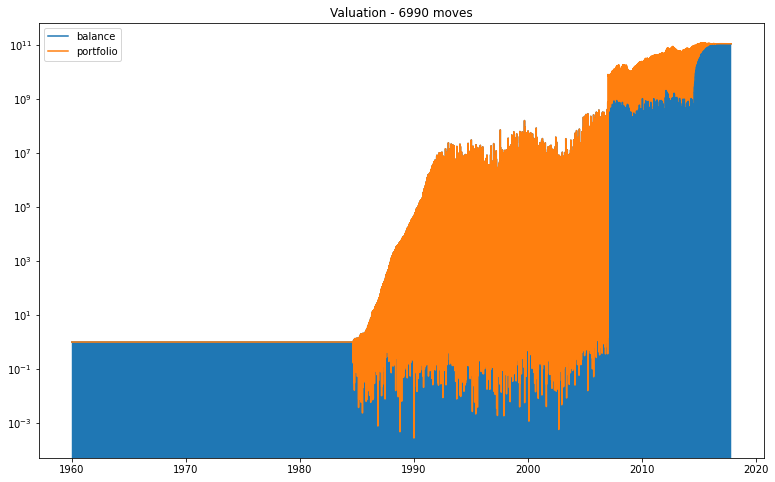

In [309]:
plot_balance_portfolio(all_dates, balance, portfolio)

In [310]:
balance[-1] / (1e+9), portfolio[-1] / (1e+9), balance[-1] == portfolio[-1]

(108.63284086224138, 108.63284086224138, True)

In [311]:
trader.num_transactions

6990

#### MSFT - 7000 moves

In [312]:
trader = One_stock_strategy_trader(['MSFT'], 7000, 200, 1.4,  '/stocks_dataset/Stocks')

all_dates = list(pd.date_range(start=trader.wallet.start_date,\
                                       end=trader.df[trader.df['Date'] == trader.df['Date'].max()].iloc[0]['Date']))
balance = []
portfolio = []
index = 0

for date in [d for d in all_dates if d < trader.cur_start_date]:
    balance.append(1)
    portfolio.append(1)
    index += 1


while trader.trader_should_trade():
    
    trader.new_subwindow_df() #calculate new working df in sliding window
    trader.calculate_low_and_high_prices() #calculate low and high prices of sliding window  
    
    start_date = trader.cur_start_date
    start_index = all_dates.index(start_date)
    
    if trader.num_transactions < trader.N - trader.keep_out_num_of_moves: #keep last few (keep out moves) transactions only to sell any remaining stocks
        # buy step
        if trader.wallet.balance > trader.min_buy_low_price: #if you have money left in the balance
            end_date = trader.cur_date_low
            end_index = all_dates.index(end_date)
            trader.buy()        
                                
        # sell step
        elif trader.cur_stocks_held: #if you have at least 1 stock of the current stock
            end_date = trader.cur_date_high
            end_index = all_dates.index(end_date)
            trader.sell()
    else: # case to sell everything
        if trader.cur_stocks_held:# if there are still stcoks after (N - keep_out transactions), then start selling everything
            end_date = trader.cur_date_high
            end_index = all_dates.index(end_date)
            trader.final_sell()
        else: # when you have sold all remaining stocks exit loop
            start_index = index
            end_date = trader.df['Date'].max()
            end_index = all_dates.index(end_date)
            for i in range(start_index, end_index + 1):
                current_date = all_dates[i]
                if len(trader.df[trader.df['Date'] == current_date]) > 0: #if it is in the df
                    previous_balance = balance[-1]
                    balance.append(previous_balance)
                    stock_close_value = trader.df[trader.df['Date'] == current_date]['Close'].iloc[0]
                    stocks_value = stock_close_value * trader.wallet.stocks_held.get(trader.cur_stock, 0)
                    portfolio.append(trader.wallet.balance + stocks_value)
                    index += 1
                else:
                    balance.append(balance[-1])
                    portfolio.append(portfolio[-1])
                    index += 1

            # and last dates from all_dates            
            break
            
               
    for i in range(start_index, end_index): #all previous days from a transaction
        current_date = all_dates[i]
        #print(current_date)
        if len(trader.df[trader.df['Date'] == current_date]) > 0: #if it is in the df
            previous_balance = balance[-1]
            balance.append(previous_balance)
            stock_close_value = trader.df[trader.df['Date'] == current_date]['Close'].iloc[0]
            stocks_value = stock_close_value * trader.wallet.stocks_held.get(trader.cur_stock, 0)
            portfolio.append(trader.wallet.balance + stocks_value)
            index += 1
        else:
            balance.append(balance[-1])
            portfolio.append(portfolio[-1])
            index += 1
 
    # Also add the transaction one
    balance.append(trader.wallet.balance) #update balance
    stock_close_value = trader.df[trader.df['Date'] == all_dates[end_index]]['Close'].iloc[0]
    stocs_value = stock_close_value * trader.wallet.stocks_held.get(trader.cur_stock, 0)
    portfolio.append(trader.wallet.balance + stocks_value)
    index += 1        
    
    trader.cur_start_date = trader.cur_start_date + pd.Timedelta(days=1) # slide date to new start (add 1 day so you are not considering same day again)

1986-03-13 buy-low MSFT 1
1986-03-14 buy-low MSFT 2
1986-03-17 buy-low MSFT 4
1986-03-18 buy-low MSFT 6
1986-03-19 sell-high MSFT 13
1986-03-20 buy-low MSFT 1
1986-03-21 buy-low MSFT 2
1986-03-24 buy-low MSFT 4
1986-03-25 buy-low MSFT 8
1986-03-26 sell-high MSFT 15
1986-03-27 buy-low MSFT 1
1986-03-31 buy-low MSFT 2
1986-04-01 buy-low MSFT 4
1986-04-02 buy-low MSFT 8
1986-04-03 buy-low MSFT 1
1986-04-04 sell-high MSFT 16
1986-04-07 buy-low MSFT 1
1986-04-08 buy-low MSFT 2
1986-04-09 buy-low MSFT 4
1986-04-10 buy-low MSFT 8
1986-04-11 buy-low MSFT 1
1986-04-14 sell-high MSFT 16
1986-04-15 buy-low MSFT 1
1986-04-16 buy-low MSFT 2
1986-04-17 buy-low MSFT 4
1986-04-18 buy-low MSFT 8
1986-04-21 buy-low MSFT 1
1986-04-22 sell-high MSFT 16
1986-04-23 buy-low MSFT 1
1986-04-24 buy-low MSFT 2
1986-04-25 buy-low MSFT 4
1986-04-28 buy-low MSFT 8
1986-04-29 sell-high MSFT 15
1986-04-30 buy-low MSFT 1
1986-05-01 buy-low MSFT 2
1986-05-02 buy-low MSFT 4
1986-05-05 buy-low MSFT 8
1986-05-06 buy-low M

1987-06-05 sell-high MSFT 69
1987-06-08 buy-low MSFT 29
1987-06-09 buy-low MSFT 43
1987-06-10 sell-high MSFT 71
1987-06-11 buy-low MSFT 30
1987-06-12 buy-low MSFT 51
1987-06-15 sell-high MSFT 78
1987-06-16 buy-low MSFT 33
1987-06-17 buy-low MSFT 45
1987-06-18 sell-high MSFT 78
1987-06-19 buy-low MSFT 33
1987-06-22 buy-low MSFT 47
1987-06-23 sell-high MSFT 80
1987-06-24 buy-low MSFT 33
1987-06-25 buy-low MSFT 47
1987-06-26 sell-high MSFT 80
1987-06-29 buy-low MSFT 33
1987-06-30 buy-low MSFT 50
1987-07-01 sell-high MSFT 82
1987-07-02 buy-low MSFT 34
1987-07-06 buy-low MSFT 52
1987-07-07 sell-high MSFT 85
1987-07-08 buy-low MSFT 35
1987-07-09 buy-low MSFT 54
1987-07-10 sell-high MSFT 87
1987-07-13 buy-low MSFT 37
1987-07-14 buy-low MSFT 48
1987-07-15 sell-high MSFT 86
1987-07-16 buy-low MSFT 36
1987-07-17 buy-low MSFT 54
1987-07-20 sell-high MSFT 89
1987-07-21 buy-low MSFT 37
1987-07-22 buy-low MSFT 55
1987-07-23 sell-high MSFT 91
1987-07-24 buy-low MSFT 38
1987-07-27 buy-low MSFT 56
1987

1988-08-17 buy-low MSFT 913
1988-08-18 sell-high MSFT 1464
1988-08-19 buy-low MSFT 587
1988-08-22 buy-low MSFT 1004
1988-08-23 sell-high MSFT 1555
1988-08-24 buy-low MSFT 623
1988-08-25 buy-low MSFT 932
1988-08-26 sell-high MSFT 1555
1988-08-29 buy-low MSFT 623
1988-08-30 buy-low MSFT 932
1988-08-31 sell-high MSFT 1555
1988-09-01 buy-low MSFT 623
1988-09-02 buy-low MSFT 1002
1988-09-06 sell-high MSFT 1605
1988-09-07 buy-low MSFT 643
1988-09-08 buy-low MSFT 1012
1988-09-09 sell-high MSFT 1640
1988-09-12 buy-low MSFT 658
1988-09-13 buy-low MSFT 1031
1988-09-14 sell-high MSFT 1675
1988-09-15 buy-low MSFT 672
1988-09-16 buy-low MSFT 1107
1988-09-19 sell-high MSFT 1750
1988-09-20 buy-low MSFT 701
1988-09-21 buy-low MSFT 1071
1988-09-22 sell-high MSFT 1765
1988-09-23 buy-low MSFT 708
1988-09-26 buy-low MSFT 1144
1988-09-27 sell-high MSFT 1827
1988-09-28 buy-low MSFT 733
1988-09-29 buy-low MSFT 1117
1988-09-30 sell-high MSFT 1844
1988-10-03 buy-low MSFT 739
1988-10-04 buy-low MSFT 1185
1988-1

1989-10-16 sell-high MSFT 8041
1989-10-17 buy-low MSFT 3218
1989-10-18 buy-low MSFT 4851
1989-10-19 sell-high MSFT 8061
1989-10-20 buy-low MSFT 3226
1989-10-23 buy-low MSFT 5310
1989-10-24 sell-high MSFT 8400
1989-10-25 buy-low MSFT 3362
1989-10-26 buy-low MSFT 5493
1989-10-27 sell-high MSFT 8725
1989-10-30 buy-low MSFT 3492
1989-10-31 buy-low MSFT 5130
1989-11-01 sell-high MSFT 8652
1989-11-02 buy-low MSFT 3462
1989-11-03 buy-low MSFT 5988
1989-11-06 sell-high MSFT 9222
1989-11-07 buy-low MSFT 3690
1989-11-08 buy-low MSFT 5568
1989-11-09 sell-high MSFT 9247
1989-11-10 buy-low MSFT 3701
1989-11-13 buy-low MSFT 5722
1989-11-14 sell-high MSFT 9373
1989-11-15 buy-low MSFT 3751
1989-11-16 buy-low MSFT 5965
1989-11-17 sell-high MSFT 9618
1989-11-20 buy-low MSFT 3849
1989-11-21 buy-low MSFT 6019
1989-11-22 sell-high MSFT 9797
1989-11-24 buy-low MSFT 3920
1989-11-27 buy-low MSFT 6099
1989-11-28 sell-high MSFT 9955
1989-11-29 buy-low MSFT 3984
1989-11-30 buy-low MSFT 6468
1989-12-01 sell-high 

1990-11-21 buy-low MSFT 1
1990-11-23 sell-high MSFT 71057
1990-11-26 buy-low MSFT 28424
1990-11-27 buy-low MSFT 44417
1990-11-28 sell-high MSFT 72331
1990-11-29 buy-low MSFT 28934
1990-11-30 buy-low MSFT 46178
1990-12-03 sell-high MSFT 74317
1990-12-04 buy-low MSFT 29729
1990-12-05 buy-low MSFT 45221
1990-12-06 sell-high MSFT 74770
1990-12-07 buy-low MSFT 29909
1990-12-10 buy-low MSFT 49301
1990-12-11 sell-high MSFT 77941
1990-12-12 buy-low MSFT 31178
1990-12-13 buy-low MSFT 50605
1990-12-14 sell-high MSFT 80685
1990-12-17 buy-low MSFT 32276
1990-12-18 buy-low MSFT 49427
1990-12-19 sell-high MSFT 81412
1990-12-20 buy-low MSFT 32567
1990-12-21 buy-low MSFT 49535
1990-12-24 sell-high MSFT 81905
1990-12-26 buy-low MSFT 32764
1990-12-27 buy-low MSFT 50055
1990-12-28 sell-high MSFT 82558
1990-12-31 buy-low MSFT 33025
1991-01-02 buy-low MSFT 50455
1991-01-03 sell-high MSFT 83217
1991-01-04 buy-low MSFT 33288
1991-01-07 buy-low MSFT 51775
1991-01-08 sell-high MSFT 84535
1991-01-09 buy-low MSF

1991-12-16 sell-high MSFT 413985
1991-12-17 buy-low MSFT 165595
1991-12-18 buy-low MSFT 254553
1991-12-19 sell-high MSFT 418387
1991-12-20 buy-low MSFT 167356
1991-12-23 buy-low MSFT 254108
1991-12-24 sell-high MSFT 420585
1991-12-26 buy-low MSFT 168235
1991-12-27 buy-low MSFT 254855
1991-12-30 sell-high MSFT 422374
1991-12-31 buy-low MSFT 168951
1992-01-02 buy-low MSFT 261196
1992-01-03 sell-high MSFT 427926
1992-01-06 buy-low MSFT 171172
1992-01-07 buy-low MSFT 257529
1992-01-08 sell-high MSFT 428480
1992-01-09 buy-low MSFT 171393
1992-01-10 buy-low MSFT 262637
1992-01-13 sell-high MSFT 432444
1992-01-14 buy-low MSFT 172979
1992-01-15 buy-low MSFT 264141
1992-01-16 sell-high MSFT 435784
1992-01-17 buy-low MSFT 174315
1992-01-20 buy-low MSFT 294257
1992-01-21 sell-high MSFT 459204
1992-01-22 buy-low MSFT 183683
1992-01-23 buy-low MSFT 280679
1992-01-24 sell-high MSFT 462888
1992-01-27 buy-low MSFT 185157
1992-01-28 buy-low MSFT 309274
1992-01-29 sell-high MSFT 485419
1992-01-30 buy-lo

1993-01-20 buy-low MSFT 1838728
1993-01-21 sell-high MSFT 3000539
1993-01-22 buy-low MSFT 1200217
1993-01-25 buy-low MSFT 1858911
1993-01-26 sell-high MSFT 3042388
1993-01-27 buy-low MSFT 1216957
1993-01-28 buy-low MSFT 1994103
1993-01-29 sell-high MSFT 3162868
1993-02-01 buy-low MSFT 1265149
1993-02-02 buy-low MSFT 1949692
1993-02-03 sell-high MSFT 3199992
1993-02-04 buy-low MSFT 1279998
1993-02-05 buy-low MSFT 2191608
1993-02-08 sell-high MSFT 3394002
1993-02-09 buy-low MSFT 1357602
1993-02-10 buy-low MSFT 2248662
1993-02-11 sell-high MSFT 3003266
1993-02-12 buy-low MSFT 1960600
1993-02-16 buy-low MSFT 1218588
1993-02-17 sell-high MSFT 3671276
1993-02-18 buy-low MSFT 1468512
1993-02-19 buy-low MSFT 2291984
1993-02-22 sell-high MSFT 3735005
1993-02-23 buy-low MSFT 1494003
1993-02-24 buy-low MSFT 2383380
1993-02-25 sell-high MSFT 3836703
1993-02-26 buy-low MSFT 1534683
1993-03-01 buy-low MSFT 2436946
1993-03-02 sell-high MSFT 3643655
1993-03-03 buy-low MSFT 1862657
1993-03-04 buy-low M

1994-01-28 sell-high MSFT 3975393
1994-01-31 buy-low MSFT 4008455
1994-02-01 sell-high MSFT 4177414
1994-02-02 buy-low MSFT 4247909
1994-02-03 buy-low MSFT 1
1994-02-04 sell-high MSFT 7425535
1994-02-07 buy-low MSFT 7892162
1994-02-08 sell-high MSFT 13074521
1994-02-09 buy-low MSFT 5229810
1994-02-10 buy-low MSFT 8149926
1994-02-11 sell-high MSFT 5102454
1994-02-14 buy-low MSFT 5148437
1994-02-15 sell-high MSFT 2741399
1994-02-16 buy-low MSFT 2791106
1994-02-17 sell-high MSFT 8071088
1994-02-18 buy-low MSFT 8179134
1994-02-22 sell-high MSFT 6003191
1994-02-23 buy-low MSFT 6166278
1994-02-24 sell-high MSFT 7837170
1994-02-25 buy-low MSFT 7043488
1994-02-28 buy-low MSFT 851557
1994-03-01 sell-high MSFT 4563530
1994-03-02 buy-low MSFT 4683869
1994-03-03 sell-high MSFT 2996583
1994-03-04 buy-low MSFT 3089396
1994-03-07 sell-high MSFT 2899370
1994-03-08 buy-low MSFT 2989657
1994-03-09 sell-high MSFT 3514848
1994-03-10 buy-low MSFT 3561398
1994-03-11 sell-high MSFT 3309183
1994-03-14 buy-low

1995-02-06 sell-high MSFT 4589657
1995-02-07 buy-low MSFT 4406168
1995-02-08 buy-low MSFT 222437
1995-02-09 sell-high MSFT 4025063
1995-02-10 buy-low MSFT 4083639
1995-02-13 sell-high MSFT 3622693
1995-02-14 buy-low MSFT 3696577
1995-02-15 sell-high MSFT 13955497
1995-02-16 buy-low MSFT 7541734
1995-02-17 buy-low MSFT 5027114
1995-02-21 buy-low MSFT 1654402
1995-02-22 sell-high MSFT 5781728
1995-02-23 buy-low MSFT 5883742
1995-02-24 sell-high MSFT 3244627
1995-02-27 buy-low MSFT 3282644
1995-02-28 sell-high MSFT 4988229
1995-03-01 buy-low MSFT 5030137
1995-03-02 sell-high MSFT 2471937
1995-03-03 buy-low MSFT 2492670
1995-03-06 sell-high MSFT 4286930
1995-03-07 buy-low MSFT 4299143
1995-03-08 sell-high MSFT 13299919
1995-03-09 buy-low MSFT 7740352
1995-03-10 buy-low MSFT 5891123
1995-03-13 buy-low MSFT 53071
1995-03-14 sell-high MSFT 7465939
1995-03-15 buy-low MSFT 7614887
1995-03-16 buy-low MSFT 21030
1995-03-17 sell-high MSFT 5683604
1995-03-20 buy-low MSFT 5020309
1995-03-21 buy-low 

1996-02-14 sell-high MSFT 7614948
1996-02-15 buy-low MSFT 6937162
1996-02-16 buy-low MSFT 856969
1996-02-20 sell-high MSFT 6093112
1996-02-21 buy-low MSFT 6149036
1996-02-22 sell-high MSFT 10110581
1996-02-23 buy-low MSFT 10181105
1996-02-26 sell-high MSFT 6046936
1996-02-27 buy-low MSFT 6263000
1996-02-28 sell-high MSFT 5700920
1996-02-29 buy-low MSFT 5896757
1996-03-01 sell-high MSFT 14966662
1996-03-04 buy-low MSFT 9644446
1996-03-05 buy-low MSFT 5785767
1996-03-06 sell-high MSFT 4201413
1996-03-07 buy-low MSFT 4294408
1996-03-08 sell-high MSFT 10302729
1996-03-11 buy-low MSFT 9913878
1996-03-12 buy-low MSFT 661954
1996-03-13 sell-high MSFT 14877196
1996-03-14 buy-low MSFT 8059544
1996-03-15 buy-low MSFT 7003625
1996-03-18 sell-high MSFT 11341993
1996-03-19 buy-low MSFT 11477478
1996-03-20 sell-high MSFT 8823575
1996-03-21 buy-low MSFT 8813611
1996-03-22 buy-low MSFT 546680
1996-03-25 sell-high MSFT 6016861
1996-03-26 buy-low MSFT 6234321
1996-03-27 sell-high MSFT 5005849
1996-03-28

1997-02-21 buy-low MSFT 7429949
1997-02-24 sell-high MSFT 6512418
1997-02-25 buy-low MSFT 6601011
1997-02-26 sell-high MSFT 4637503
1997-02-27 buy-low MSFT 4847766
1997-02-28 sell-high MSFT 7443990
1997-03-03 buy-low MSFT 7160341
1997-03-04 buy-low MSFT 405820
1997-03-05 sell-high MSFT 4404345
1997-03-06 buy-low MSFT 4553080
1997-03-07 sell-high MSFT 4370016
1997-03-10 buy-low MSFT 4532833
1997-03-11 sell-high MSFT 4516747
1997-03-12 buy-low MSFT 4647951
1997-03-13 sell-high MSFT 4320043
1997-03-14 buy-low MSFT 4375094
1997-03-17 sell-high MSFT 7970534
1997-03-18 buy-low MSFT 7843169
1997-03-19 buy-low MSFT 290116
1997-03-20 sell-high MSFT 7728641
1997-03-21 buy-low MSFT 8130123
1997-03-24 sell-high MSFT 17683379
1997-03-25 buy-low MSFT 11922065
1997-03-26 buy-low MSFT 6559140
1997-03-27 sell-high MSFT 8916156
1997-03-31 buy-low MSFT 9395700
1997-04-01 buy-low MSFT 1
1997-04-02 sell-high MSFT 6012304
1997-04-03 buy-low MSFT 6213772
1997-04-04 sell-high MSFT 9015343
1997-04-07 buy-low M

1998-02-26 sell-high MSFT 5827828
1998-02-27 buy-low MSFT 5904399
1998-03-02 sell-high MSFT 4755601
1998-03-03 buy-low MSFT 4946070
1998-03-04 sell-high MSFT 6789095
1998-03-05 buy-low MSFT 7177446
1998-03-06 sell-high MSFT 4880080
1998-03-09 buy-low MSFT 5080153
1998-03-10 sell-high MSFT 4500494
1998-03-11 buy-low MSFT 4598892
1998-03-12 sell-high MSFT 4553239
1998-03-13 buy-low MSFT 4325147
1998-03-16 buy-low MSFT 286139
1998-03-17 sell-high MSFT 5111492
1998-03-18 buy-low MSFT 4503935
1998-03-19 buy-low MSFT 708314
1998-03-20 sell-high MSFT 5345752
1998-03-23 buy-low MSFT 5475494
1998-03-24 sell-high MSFT 3064632
1998-03-25 buy-low MSFT 2988437
1998-03-26 sell-high MSFT 4313929
1998-03-27 buy-low MSFT 4412413
1998-03-30 sell-high MSFT 2607200
1998-03-31 buy-low MSFT 2611272
1998-04-01 sell-high MSFT 3496962
1998-04-02 buy-low MSFT 3526333
1998-04-03 sell-high MSFT 3891129
1998-04-06 buy-low MSFT 4064599
1998-04-07 sell-high MSFT 5945812
1998-04-08 buy-low MSFT 4890112
1998-04-09 buy

1999-03-17 buy-low MSFT 5970176
1999-03-18 buy-low MSFT 667499
1999-03-19 sell-high MSFT 8732097
1999-03-22 buy-low MSFT 7405530
1999-03-23 buy-low MSFT 1484295
1999-03-24 sell-high MSFT 7844841
1999-03-25 buy-low MSFT 7814858
1999-03-26 sell-high MSFT 8989103
1999-03-29 buy-low MSFT 9225952
1999-03-30 sell-high MSFT 6408295
1999-03-31 buy-low MSFT 6723874
1999-04-01 sell-high MSFT 3902370
1999-04-05 buy-low MSFT 3876522
1999-04-06 sell-high MSFT 3766500
1999-04-07 buy-low MSFT 3946526
1999-04-08 sell-high MSFT 3667977
1999-04-09 buy-low MSFT 3732139
1999-04-12 sell-high MSFT 3594099
1999-04-13 buy-low MSFT 3772996
1999-04-14 sell-high MSFT 5026203
1999-04-15 buy-low MSFT 5459905
1999-04-16 sell-high MSFT 4250589
1999-04-19 buy-low MSFT 4712475
1999-04-20 sell-high MSFT 10296519
1999-04-21 buy-low MSFT 10809669
1999-04-22 sell-high MSFT 5230539
1999-04-23 buy-low MSFT 5370895
1999-04-26 sell-high MSFT 4590055
1999-04-27 buy-low MSFT 4863162
1999-04-28 sell-high MSFT 5312847
1999-04-29 

2000-03-15 sell-high MSFT 5051265
2000-03-16 buy-low MSFT 5234866
2000-03-17 sell-high MSFT 7705021
2000-03-20 buy-low MSFT 6349416
2000-03-21 buy-low MSFT 1595650
2000-03-22 sell-high MSFT 8921529
2000-03-23 buy-low MSFT 8837893
2000-03-24 sell-high MSFT 10651327
2000-03-27 buy-low MSFT 11784777
2000-03-28 sell-high MSFT 7700541
2000-03-29 buy-low MSFT 7870336
2000-03-30 sell-high MSFT 6092733
2000-03-31 buy-low MSFT 6356227
2000-04-03 buy-low MSFT 1
2000-04-04 sell-high MSFT 17206314
2000-04-05 buy-low MSFT 11016429
2000-04-06 buy-low MSFT 7473123
2000-04-07 sell-high MSFT 7842866
2000-04-10 buy-low MSFT 8065578
2000-04-11 buy-low MSFT 86188
2000-04-12 sell-high MSFT 14525313
2000-04-13 buy-low MSFT 12535383
2000-04-14 buy-low MSFT 2789988
2000-04-17 sell-high MSFT 11370492
2000-04-18 buy-low MSFT 11387620
2000-04-19 sell-high MSFT 5099435
2000-04-20 buy-low MSFT 5361411
2000-04-24 sell-high MSFT 29775751
2000-04-25 buy-low MSFT 21201147
2000-04-26 buy-low MSFT 8774517
2000-04-27 sel

2001-03-30 sell-high MSFT 8671700
2001-04-02 buy-low MSFT 8918511
2001-04-03 sell-high MSFT 8891738
2001-04-04 buy-low MSFT 9675255
2001-04-05 sell-high MSFT 10743110
2001-04-06 buy-low MSFT 11194327
2001-04-09 sell-high MSFT 5343720
2001-04-10 buy-low MSFT 5308347
2001-04-11 sell-high MSFT 10430225
2001-04-12 buy-low MSFT 10801866
2001-04-16 sell-high MSFT 6250817
2001-04-17 buy-low MSFT 6405974
2001-04-18 sell-high MSFT 14870968
2001-04-19 buy-low MSFT 14997813
2001-04-20 sell-high MSFT 18272485
2001-04-23 buy-low MSFT 12249285
2001-04-24 buy-low MSFT 7159399
2001-04-25 sell-high MSFT 7271988
2001-04-26 buy-low MSFT 7438509
2001-04-27 sell-high MSFT 12088575
2001-04-30 buy-low MSFT 9884132
2001-05-01 buy-low MSFT 2561065
2001-05-02 sell-high MSFT 8816018
2001-05-03 buy-low MSFT 8808295
2001-05-04 buy-low MSFT 398515
2001-05-07 sell-high MSFT 10380992
2001-05-08 buy-low MSFT 9977274
2001-05-09 buy-low MSFT 614426
2001-05-10 sell-high MSFT 6085575
2001-05-11 buy-low MSFT 6317024
2001-0

2002-05-01 buy-low MSFT 7728978
2002-05-02 sell-high MSFT 7500761
2002-05-03 buy-low MSFT 8192606
2002-05-06 sell-high MSFT 6288412
2002-05-07 buy-low MSFT 6571546
2002-05-08 sell-high MSFT 9613239
2002-05-09 buy-low MSFT 10182982
2002-05-10 sell-high MSFT 6125390
2002-05-13 buy-low MSFT 6485726
2002-05-14 sell-high MSFT 6158560
2002-05-15 buy-low MSFT 6302037
2002-05-16 sell-high MSFT 5070176
2002-05-17 buy-low MSFT 5139657
2002-05-20 sell-high MSFT 4948148
2002-05-21 buy-low MSFT 5271550
2002-05-22 sell-high MSFT 5123073
2002-05-23 buy-low MSFT 5192182
2002-05-24 sell-high MSFT 3419116
2002-05-28 buy-low MSFT 3601546
2002-05-29 sell-high MSFT 4290044
2002-05-30 buy-low MSFT 4397140
2002-05-31 sell-high MSFT 6309791
2002-06-03 buy-low MSFT 6853115
2002-06-04 sell-high MSFT 8296158
2002-06-05 buy-low MSFT 8442043
2002-06-06 sell-high MSFT 6935597
2002-06-07 buy-low MSFT 7252078
2002-06-10 sell-high MSFT 6805899
2002-06-11 buy-low MSFT 6919089
2002-06-12 sell-high MSFT 12911809
2002-06-

2003-05-01 buy-low MSFT 5398711
2003-05-02 sell-high MSFT 5014005
2003-05-05 buy-low MSFT 5103255
2003-05-06 sell-high MSFT 5170897
2003-05-07 buy-low MSFT 5304705
2003-05-08 sell-high MSFT 4417605
2003-05-09 buy-low MSFT 4460688
2003-05-12 sell-high MSFT 5127711
2003-05-13 buy-low MSFT 5242204
2003-05-14 buy-low MSFT 1
2003-05-15 sell-high MSFT 4338444
2003-05-16 buy-low MSFT 4441005
2003-05-19 sell-high MSFT 5263836
2003-05-20 buy-low MSFT 5489160
2003-05-21 sell-high MSFT 10361903
2003-05-22 buy-low MSFT 10648890
2003-05-23 sell-high MSFT 7314981
2003-05-27 buy-low MSFT 7412118
2003-05-28 sell-high MSFT 8688987
2003-05-29 buy-low MSFT 8915350
2003-05-30 sell-high MSFT 8107192
2003-06-02 buy-low MSFT 8217240
2003-06-03 sell-high MSFT 5796959
2003-06-04 buy-low MSFT 5838373
2003-06-05 sell-high MSFT 11025374
2003-06-06 buy-low MSFT 11430554
2003-06-09 sell-high MSFT 6989954
2003-06-10 buy-low MSFT 7030467
2003-06-11 sell-high MSFT 7194155
2003-06-12 buy-low MSFT 7255983
2003-06-13 sel

2004-05-21 buy-low MSFT 4961935
2004-05-24 sell-high MSFT 5340132
2004-05-25 buy-low MSFT 5458796
2004-05-26 sell-high MSFT 4775849
2004-05-27 buy-low MSFT 4816739
2004-05-28 sell-high MSFT 3549874
2004-06-01 buy-low MSFT 3615349
2004-06-02 sell-high MSFT 5128343
2004-06-03 buy-low MSFT 5212695
2004-06-04 sell-high MSFT 4634577
2004-06-07 buy-low MSFT 4682493
2004-06-08 sell-high MSFT 5548683
2004-06-09 buy-low MSFT 5600357
2004-06-10 sell-high MSFT 4567224
2004-06-14 buy-low MSFT 4612530
2004-06-15 sell-high MSFT 10839921
2004-06-16 buy-low MSFT 8962130
2004-06-17 buy-low MSFT 2043491
2004-06-18 sell-high MSFT 12742411
2004-06-21 buy-low MSFT 12914060
2004-06-22 sell-high MSFT 9392040
2004-06-23 buy-low MSFT 7792367
2004-06-24 buy-low MSFT 1696125
2004-06-25 sell-high MSFT 6773916
2004-06-28 buy-low MSFT 6887081
2004-06-29 sell-high MSFT 5266513
2004-06-30 buy-low MSFT 5301526
2004-07-01 sell-high MSFT 7496716
2004-07-02 buy-low MSFT 4876405
2004-07-06 buy-low MSFT 2782514
2004-07-07 

2005-06-14 sell-high MSFT 3867498
2005-06-15 buy-low MSFT 3918007
2005-06-16 sell-high MSFT 5691009
2005-06-17 buy-low MSFT 5761816
2005-06-20 sell-high MSFT 4322756
2005-06-21 buy-low MSFT 4364135
2005-06-22 sell-high MSFT 5178391
2005-06-23 buy-low MSFT 5200981
2005-06-24 sell-high MSFT 5022936
2005-06-27 buy-low MSFT 5096641
2005-06-28 sell-high MSFT 4520769
2005-06-29 buy-low MSFT 4556997
2005-06-30 sell-high MSFT 6969747
2005-07-01 buy-low MSFT 7102828
2005-07-05 sell-high MSFT 5271187
2005-07-06 buy-low MSFT 5377858
2005-07-07 sell-high MSFT 6879793
2005-07-08 buy-low MSFT 6692373
2005-07-11 buy-low MSFT 206377
2005-07-12 sell-high MSFT 5407705
2005-07-13 buy-low MSFT 5359376
2005-07-14 buy-low MSFT 77253
2005-07-15 sell-high MSFT 4810879
2005-07-18 buy-low MSFT 4730893
2005-07-19 buy-low MSFT 181855
2005-07-20 sell-high MSFT 6145594
2005-07-21 buy-low MSFT 6155108
2005-07-22 sell-high MSFT 8507516
2005-07-25 buy-low MSFT 5389829
2005-07-26 buy-low MSFT 3362176
2005-07-27 sell-hi

2006-07-06 sell-high MSFT 3813803
2006-07-07 buy-low MSFT 3864945
2006-07-10 sell-high MSFT 4307030
2006-07-11 buy-low MSFT 4480712
2006-07-12 sell-high MSFT 6590858
2006-07-13 buy-low MSFT 6776635
2006-07-14 sell-high MSFT 5748905
2006-07-17 buy-low MSFT 4418594
2006-07-18 buy-low MSFT 1391507
2006-07-19 sell-high MSFT 7000427
2006-07-20 buy-low MSFT 7209318
2006-07-21 sell-high MSFT 14947353
2006-07-24 buy-low MSFT 7105405
2006-07-25 buy-low MSFT 7163198
2006-07-26 buy-low MSFT 859324
2006-07-27 sell-high MSFT 7272992
2006-07-28 buy-low MSFT 6165180
2006-07-31 buy-low MSFT 1273453
2006-08-01 sell-high MSFT 4175574
2006-08-02 buy-low MSFT 4205206
2006-08-03 sell-high MSFT 3674896
2006-08-04 buy-low MSFT 3725344
2006-08-07 sell-high MSFT 3139800
2006-08-08 buy-low MSFT 3176158
2006-08-09 sell-high MSFT 3775162
2006-08-10 buy-low MSFT 3786576
2006-08-11 buy-low MSFT 35585
2006-08-14 sell-high MSFT 4073618
2006-08-15 buy-low MSFT 4100252
2006-08-16 sell-high MSFT 4460910
2006-08-17 buy-l

2007-07-20 buy-low MSFT 10649569
2007-07-23 sell-high MSFT 4152448
2007-07-24 buy-low MSFT 4261604
2007-07-25 sell-high MSFT 4681194
2007-07-26 buy-low MSFT 4965138
2007-07-27 sell-high MSFT 5852653
2007-07-30 buy-low MSFT 6064793
2007-07-31 sell-high MSFT 5641773
2007-08-01 buy-low MSFT 5815445
2007-08-02 sell-high MSFT 4083283
2007-08-03 buy-low MSFT 4209496
2007-08-06 sell-high MSFT 5070471
2007-08-07 buy-low MSFT 5155391
2007-08-08 sell-high MSFT 4503996
2007-08-09 buy-low MSFT 4674312
2007-08-10 sell-high MSFT 6499881
2007-08-13 buy-low MSFT 6570394
2007-08-14 buy-low MSFT 69060
2007-08-15 sell-high MSFT 4098096
2007-08-16 buy-low MSFT 4318732
2007-08-17 sell-high MSFT 6596775
2007-08-20 buy-low MSFT 5878769
2007-08-21 buy-low MSFT 763525
2007-08-22 sell-high MSFT 3742244
2007-08-23 buy-low MSFT 3771465
2007-08-24 sell-high MSFT 3845419
2007-08-27 buy-low MSFT 3905648
2007-08-28 sell-high MSFT 3734061
2007-08-29 buy-low MSFT 3824171
2007-08-30 sell-high MSFT 2858507
2007-08-31 buy

2008-07-18 sell-high MSFT 12796824
2008-07-21 buy-low MSFT 9241606
2008-07-22 buy-low MSFT 4034311
2008-07-23 sell-high MSFT 6636784
2008-07-24 buy-low MSFT 7002037
2008-07-25 sell-high MSFT 4983090
2008-07-28 buy-low MSFT 5155673
2008-07-29 sell-high MSFT 5649898
2008-07-30 buy-low MSFT 5713374
2008-07-31 sell-high MSFT 5093866
2008-08-01 buy-low MSFT 5339546
2008-08-04 sell-high MSFT 5145252
2008-08-05 buy-low MSFT 5155117
2008-08-06 sell-high MSFT 8135688
2008-08-07 buy-low MSFT 8265984
2008-08-08 sell-high MSFT 6883529
2008-08-11 buy-low MSFT 7025384
2008-08-12 sell-high MSFT 5348870
2008-08-13 buy-low MSFT 5465144
2008-08-14 sell-high MSFT 4236045
2008-08-15 buy-low MSFT 4343371
2008-08-18 sell-high MSFT 3240307
2008-08-19 buy-low MSFT 3332830
2008-08-20 sell-high MSFT 3533456
2008-08-21 buy-low MSFT 3628527
2008-08-22 sell-high MSFT 4082605
2008-08-25 buy-low MSFT 4145013
2008-08-26 sell-high MSFT 3813718
2008-08-27 buy-low MSFT 3896690
2008-08-28 sell-high MSFT 4120220
2008-08-2

2009-07-29 buy-low MSFT 1076889
2009-07-30 sell-high MSFT 5768323
2009-07-31 buy-low MSFT 5996948
2009-08-03 sell-high MSFT 3990171
2009-08-04 buy-low MSFT 4046391
2009-08-05 sell-high MSFT 4537289
2009-08-06 buy-low MSFT 4728183
2009-08-07 sell-high MSFT 3932294
2009-08-10 buy-low MSFT 4020448
2009-08-11 sell-high MSFT 2863129
2009-08-12 buy-low MSFT 2909383
2009-08-13 sell-high MSFT 3317852
2009-08-14 buy-low MSFT 3365985
2009-08-17 sell-high MSFT 3616980
2009-08-18 buy-low MSFT 3668508
2009-08-19 sell-high MSFT 3562085
2009-08-20 buy-low MSFT 3589153
2009-08-21 sell-high MSFT 5877084
2009-08-24 buy-low MSFT 5910276
2009-08-25 sell-high MSFT 3744567
2009-08-26 buy-low MSFT 3806011
2009-08-27 sell-high MSFT 3871367
2009-08-28 buy-low MSFT 3898005
2009-08-31 sell-high MSFT 4223656
2009-09-01 buy-low MSFT 4391397
2009-09-02 sell-high MSFT 3468961
2009-09-03 buy-low MSFT 3524148
2009-09-04 sell-high MSFT 3831950
2009-09-08 buy-low MSFT 3893354
2009-09-09 sell-high MSFT 4250143
2009-09-10

2010-11-12 sell-high MSFT 5531258
2010-11-16 buy-low MSFT 5718985
2010-11-18 sell-high MSFT 5071276
2010-11-22 buy-low MSFT 5198700
2010-11-23 sell-high MSFT 5940310
2010-11-24 buy-low MSFT 6043637
2010-11-29 sell-high MSFT 4817008
2010-11-30 buy-low MSFT 4897188
2010-12-02 sell-high MSFT 7815859
2010-12-06 buy-low MSFT 4322521
2010-12-08 buy-low MSFT 3551693
2010-12-10 sell-high MSFT 3202947
2010-12-13 buy-low MSFT 3230219
2010-12-15 sell-high MSFT 5924064
2010-12-16 buy-low MSFT 5994811
2010-12-17 sell-high MSFT 7431051
2010-12-20 buy-low MSFT 6279919
2010-12-21 buy-low MSFT 1257688
2010-12-22 sell-high MSFT 3598906
2010-12-27 buy-low MSFT 2580422
2010-12-29 buy-low MSFT 1085508
2010-12-30 sell-high MSFT 1769640
2010-12-31 buy-low MSFT 1793854
2011-01-03 sell-high MSFT 4551824
2011-01-05 buy-low MSFT 4619458
2011-01-06 sell-high MSFT 7494877
2011-01-10 buy-low MSFT 6861407
2011-01-11 buy-low MSFT 849633
2011-01-12 sell-high MSFT 4482128
2011-01-14 buy-low MSFT 4590897
2011-01-18 sell

2012-06-21 buy-low MSFT 5588787
2012-06-25 buy-low MSFT 879398
2012-06-27 sell-high MSFT 2781116
2012-06-28 buy-low MSFT 2883494
2012-06-29 sell-high MSFT 4548918
2012-07-03 buy-low MSFT 2415148
2012-07-06 buy-low MSFT 2228386
2012-07-09 sell-high MSFT 2527555
2012-07-11 buy-low MSFT 2625620
2012-07-13 sell-high MSFT 3219840
2012-07-16 buy-low MSFT 3217889
2012-07-17 buy-low MSFT 50519
2012-07-19 sell-high MSFT 3841495
2012-07-23 buy-low MSFT 4078515
2012-07-24 sell-high MSFT 3931231
2012-07-25 buy-low MSFT 4010310
2012-07-27 sell-high MSFT 3644727
2012-07-31 buy-low MSFT 3709217
2012-08-01 sell-high MSFT 2613173
2012-08-02 buy-low MSFT 2674656
2012-08-06 sell-high MSFT 2263059
2012-08-07 buy-low MSFT 2281145
2012-08-09 sell-high MSFT 2052853
2012-08-13 buy-low MSFT 2085978
2012-08-14 sell-high MSFT 2827525
2012-08-15 buy-low MSFT 2789884
2012-08-16 buy-low MSFT 71920
2012-08-17 sell-high MSFT 2667007
2012-08-20 buy-low MSFT 2696583
2012-08-21 sell-high MSFT 2358595
2012-08-23 buy-low 

2013-12-17 sell-high MSFT 3590998
2013-12-18 buy-low MSFT 3750744
2013-12-20 sell-high MSFT 4935817
2013-12-23 buy-low MSFT 2768869
2013-12-24 buy-low MSFT 1570980
2013-12-30 buy-low MSFT 637491
2013-12-31 sell-high MSFT 1379075
2014-01-06 buy-low MSFT 1435227
2014-01-07 sell-high MSFT 2828670
2014-01-09 buy-low MSFT 2915747
2014-01-10 sell-high MSFT 3194998
2014-01-14 buy-low MSFT 3335225
2014-01-16 sell-high MSFT 2995460
2014-01-22 buy-low MSFT 2421883
2014-01-23 buy-low MSFT 682836
2014-01-24 sell-high MSFT 6069916
2014-01-28 buy-low MSFT 3995548
2014-01-29 buy-low MSFT 2370436
2014-02-03 sell-high MSFT 5049840
2014-02-06 buy-low MSFT 3901349
2014-02-07 buy-low MSFT 1460623
2014-02-12 sell-high MSFT 2131549
2014-02-13 buy-low MSFT 2146853
2014-02-18 sell-high MSFT 2567648
2014-02-19 buy-low MSFT 2606855
2014-02-21 sell-high MSFT 2978367
2014-02-26 buy-low MSFT 3071217
2014-02-28 sell-high MSFT 3222973
2014-03-03 buy-low MSFT 3254374
2014-03-06 buy-low MSFT 51529
2014-03-07 sell-high

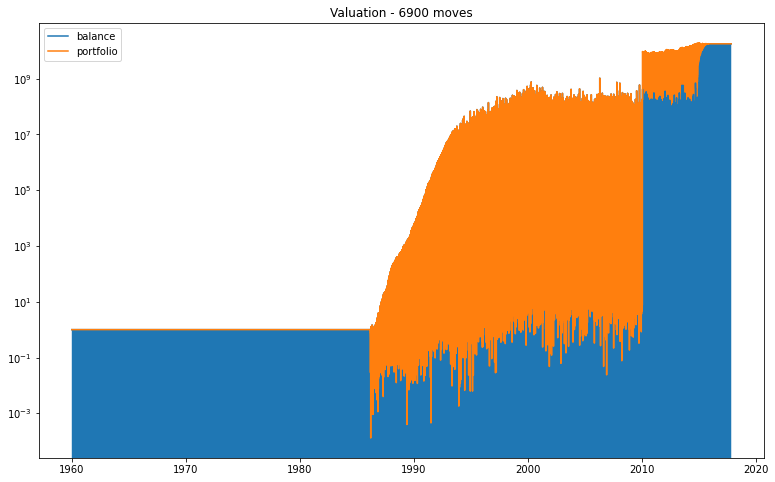

In [313]:
plot_balance_portfolio(all_dates, balance, portfolio)

In [314]:
balance[-1] / (1e+9), portfolio[-1] / (1e+9), balance[-1] == portfolio[-1]

(17.652476368778853, 17.652476368778853, True)

In [315]:
trader.num_transactions

6900

# Future work
Stocks with a spike on a certain date

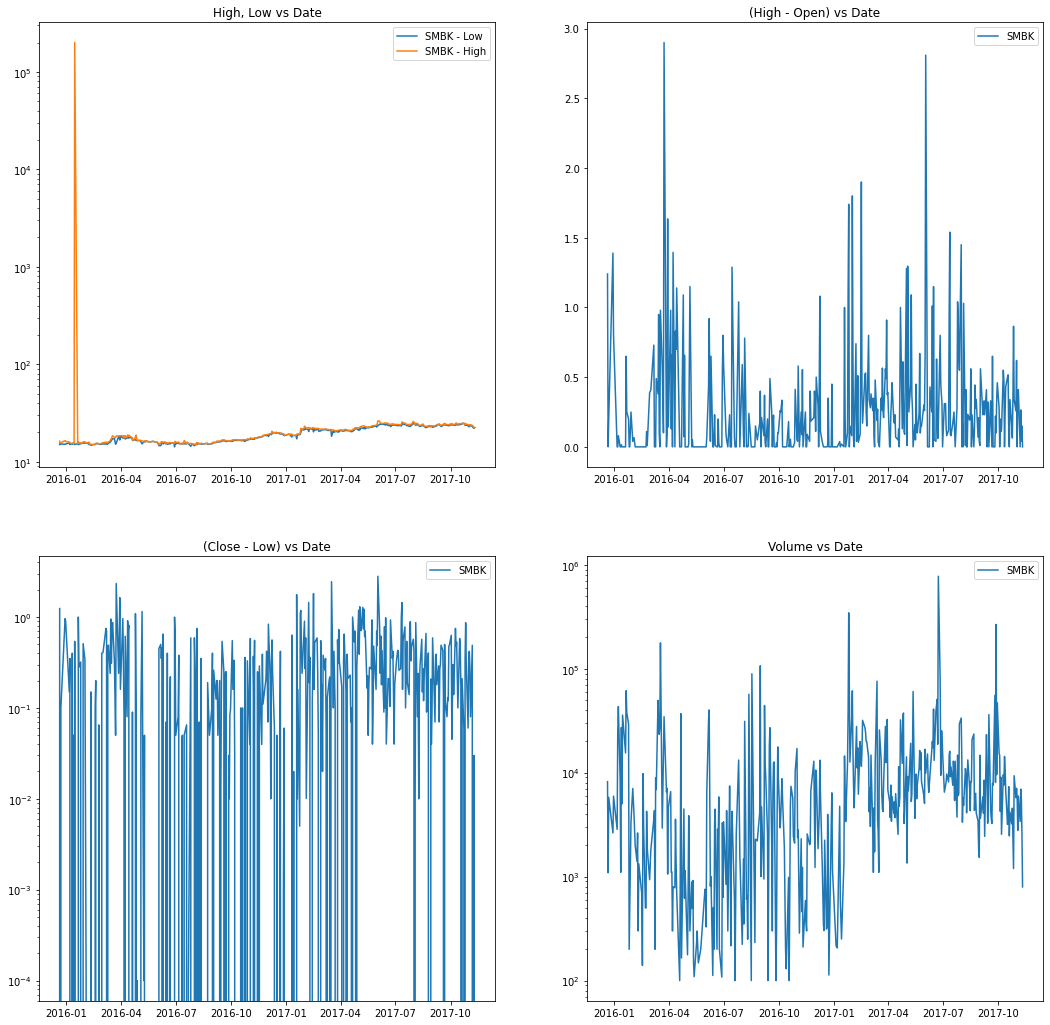

In [316]:
parse_n_plot_stocks(files_subpath, ['SMBK'], plot=True)
pass